Dataset uploading

In [ ]:


from google.colab import files
uploaded = files.upload()
# prompt: handle missing values for an csv file in google colab

import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('customer.csv')


Saving customer.csv.csv to customer.csv.csv


Handling Missing Values

In [ ]:


# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print(df.isnull().sum())


Year                           0
Date                           0
Question_Number                0
Question                       0
Number_of_Respondents          0
Very_Satisfied                 0
Satisfied                      0
Neutral                        0
Dissatisfied                   0
Very_Dissatisfied              0
Very_Satisfied_or_Satisfied    0
ObjectId                       0
dtype: int64
Year                           0
Date                           0
Question_Number                0
Question                       0
Number_of_Respondents          0
Very_Satisfied                 0
Satisfied                      0
Neutral                        0
Dissatisfied                   0
Very_Dissatisfied              0
Very_Satisfied_or_Satisfied    0
ObjectId                       0
dtype: int64


Duplicate records

In [ ]:


# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows
df = df.drop_duplicates()

# Print the DataFrame after removing duplicates
print("\nDataFrame after removing duplicates:")
df


Duplicate Rows:
Empty DataFrame
Columns: [Year, Date, Question_Number, Question, Number_of_Respondents, Very_Satisfied, Satisfied, Neutral, Dissatisfied, Very_Dissatisfied, Very_Satisfied_or_Satisfied, ObjectId]
Index: []

DataFrame after removing duplicates:


,Year,Date,Question_Number,Question,Number_of_Respondents,Very_Satisfied,Satisfied,Neutral,Dissatisfied,Very_Dissatisfied,Very_Satisfied_or_Satisfied,ObjectId
0,2017,2017/10/31 07:00:00+00,7-13,Overall quality of customer service,882,22.16,47.61,25.03,3.15,2.05,69.77,1
1,2016,2016/10/31 07:00:00+00,26,Overall quality of customer service,1202,22.39,47.83,23.37,4.35,2.07,70.22,2
2,2015,2015/10/31 07:00:00+00,Survey Not Conducted,Survey Not Conducted,99999,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,3
3,2014,2014/10/31 07:00:00+00,10b,How easy was the City to contact,493,35.95,46.07,8.26,7.44,2.27,82.02,4
4,2014,2014/10/31 07:00:00+00,10c,The way you were treated,493,44.15,40.25,8.83,4.72,2.05,84.39,5
5,2014,2014/10/31 07:00:00+00,10d,The accuracy of the information you were given,493,36.76,40.55,14.08,6.51,2.10,77.31,6
6,2014,2014/10/31 07:00:00+00,10e,How quickly staff responded to your request,493,38.05,37.63,13.10,7.69,3.53,75.68,7
7,2014,2014/10/31 07:00:00+00,10f,How well your issue was handled,493,37.92,34.58,12.50,8.96,6.04,72.50,8
8,2013,2013/10/31 07:00:00+00,14b,How easy was the City to contact,428,37.68,44.31,8.06,7.58,2.37,81.99,9
9,2013,2013/10/31 07:00:00+00,14c,The way you were treated,428,44.47,40.14,8.17,4.09,3.13,84.62,10


Outliers

In [ ]:


import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with numerical features

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


numerical_features = df.select_dtypes(include=np.number).columns
for col in numerical_features:
    outliers = find_outliers_iqr(df[col])
    print(f"Outliers in {col}:")
    print(outliers)
    print("-" * 20)



Outliers in Year:
Series([], Name: Year, dtype: int64)
--------------------
Outliers in Number_of_Respondents:
0      882
1     1202
2    99999
Name: Number_of_Respondents, dtype: int64
--------------------
Outliers in Very_Satisfied:
0       22.16
1       22.39
2    99999.00
Name: Very_Satisfied, dtype: float64
--------------------
Outliers in Satisfied:
2    99999.0
Name: Satisfied, dtype: float64
--------------------
Outliers in Neutral:
0       25.03
1       23.37
2    99999.00
Name: Neutral, dtype: float64
--------------------
Outliers in Dissatisfied:
2    99999.0
Name: Dissatisfied, dtype: float64
--------------------
Outliers in Very_Dissatisfied:
2    99999.0
Name: Very_Dissatisfied, dtype: float64
--------------------
Outliers in Very_Satisfied_or_Satisfied:
2    99999.0
Name: Very_Satisfied_or_Satisfied, dtype: float64
--------------------
Outliers in ObjectId:
Series([], Name: ObjectId, dtype: int64)
--------------------


Standardization

In [ ]:


from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with numerical features

# Create a StandardScaler object
scaler = StandardScaler()

# Select numerical columns for standardization
numerical_cols = df.select_dtypes(include=np.number).columns

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the standardized DataFrame
print("\nStandardized DataFrame:")
df



Standardized DataFrame:


,Year,Date,Question_Number,Question,Number_of_Respondents,Very_Satisfied,Satisfied,Neutral,Dissatisfied,Very_Dissatisfied,Very_Satisfied_or_Satisfied,ObjectId
0,2.483682,2017/10/31 07:00:00+00,7-13,Overall quality of customer service,-0.170565,-0.193284,-0.192013,-0.191776,-0.192621,-0.192560,-0.192846,-1.671258
1,1.940376,2016/10/31 07:00:00+00,26,Overall quality of customer service,-0.153239,-0.193271,-0.192001,-0.191865,-0.192557,-0.192558,-0.192822,-1.547461
2,1.397071,2015/10/31 07:00:00+00,Survey Not Conducted,Survey Not Conducted,5.195945,5.196152,5.196152,5.196152,5.196152,5.196152,5.196152,-1.423664
3,0.853766,2014/10/31 07:00:00+00,10b,How easy was the City to contact,-0.191626,-0.192540,-0.192096,-0.192679,-0.192390,-0.192548,-0.192186,-1.299867
4,0.853766,2014/10/31 07:00:00+00,10c,The way you were treated,-0.191626,-0.192098,-0.192409,-0.192649,-0.192537,-0.192560,-0.192058,-1.176070
5,0.853766,2014/10/31 07:00:00+00,10d,The accuracy of the information you were given,-0.191626,-0.192497,-0.192393,-0.192366,-0.192440,-0.192557,-0.192440,-1.052274
6,0.853766,2014/10/31 07:00:00+00,10e,How quickly staff responded to your request,-0.191626,-0.192427,-0.192551,-0.192419,-0.192377,-0.192480,-0.192528,-0.928477
7,0.853766,2014/10/31 07:00:00+00,10f,How well your issue was handled,-0.191626,-0.192434,-0.192715,-0.192451,-0.192308,-0.192345,-0.192699,-0.804680
8,0.310460,2013/10/31 07:00:00+00,14b,How easy was the City to contact,-0.195146,-0.192447,-0.192190,-0.192690,-0.192382,-0.192542,-0.192187,-0.680883
9,0.310460,2013/10/31 07:00:00+00,14c,The way you were treated,-0.195146,-0.192081,-0.192415,-0.192684,-0.192571,-0.192501,-0.192046,-0.557086


EDA

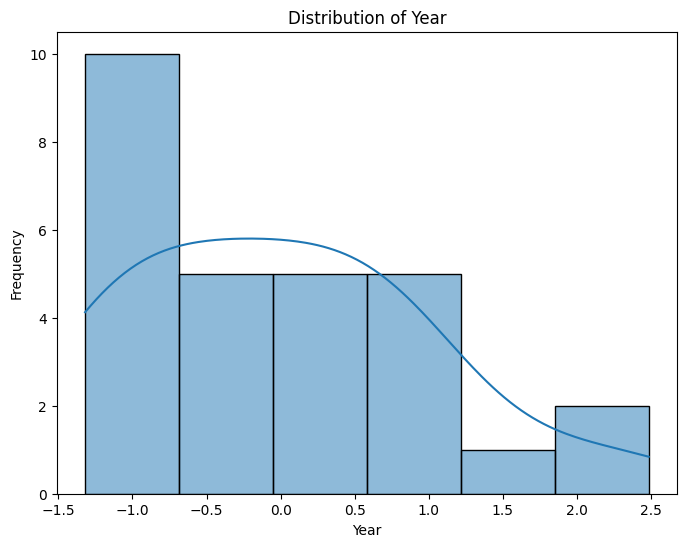

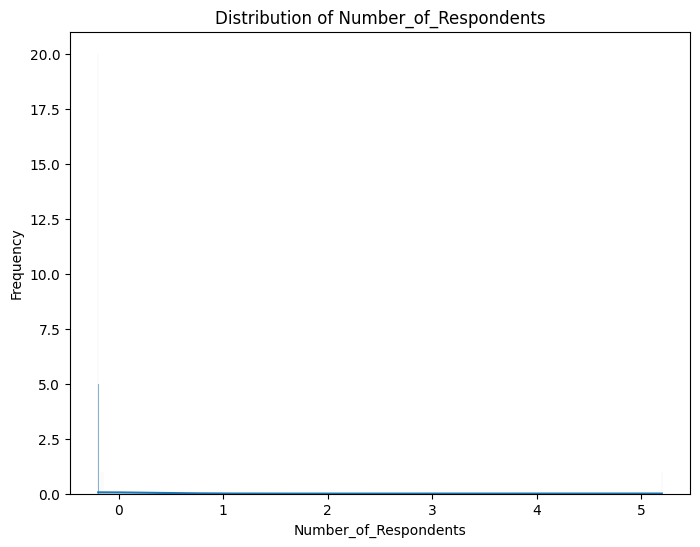

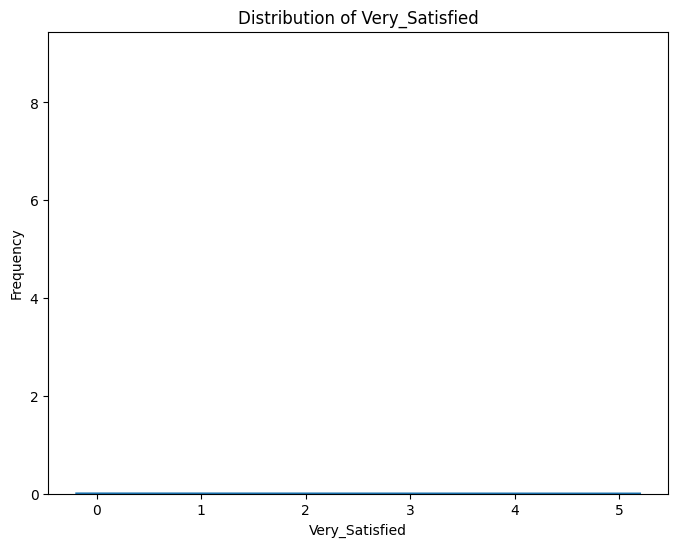

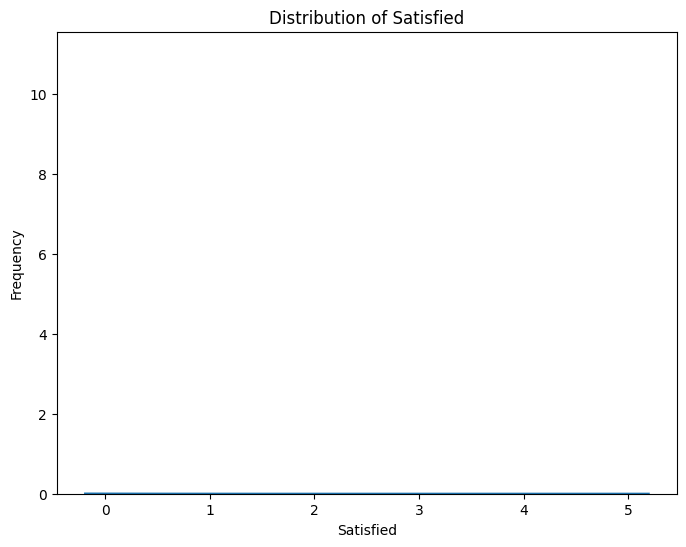

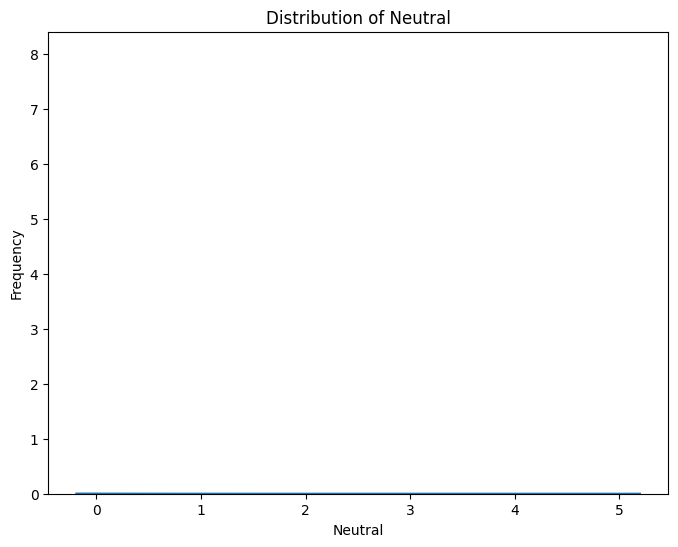

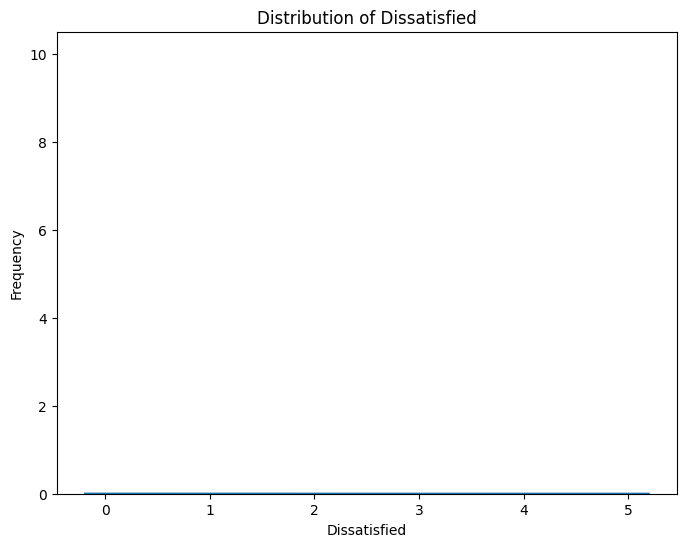

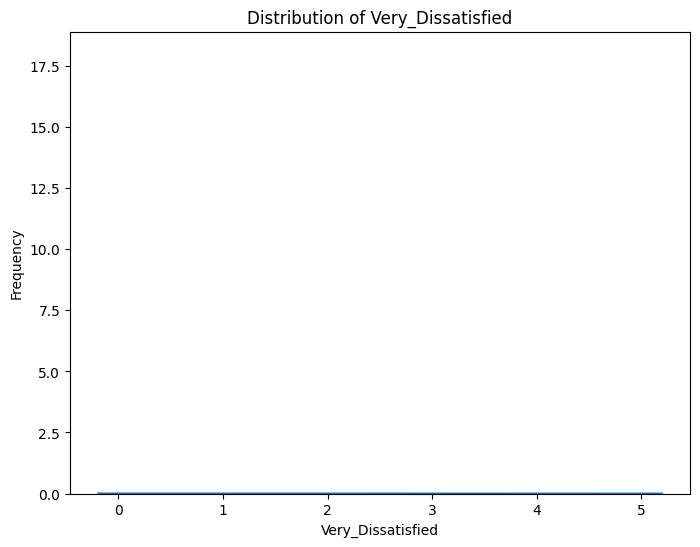

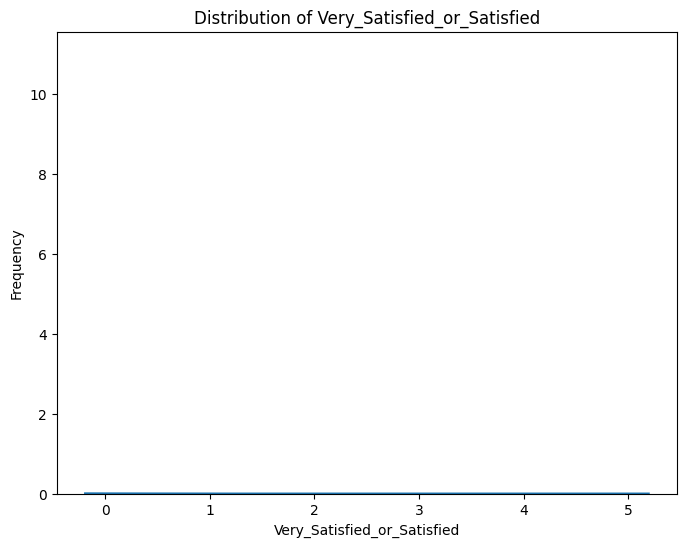

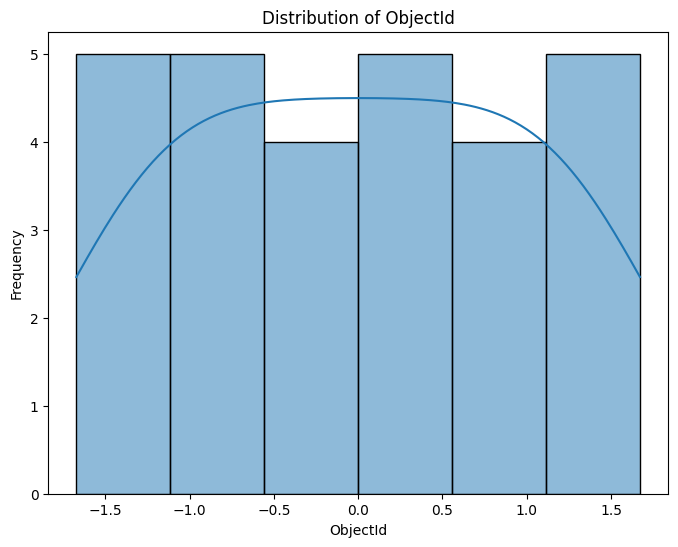

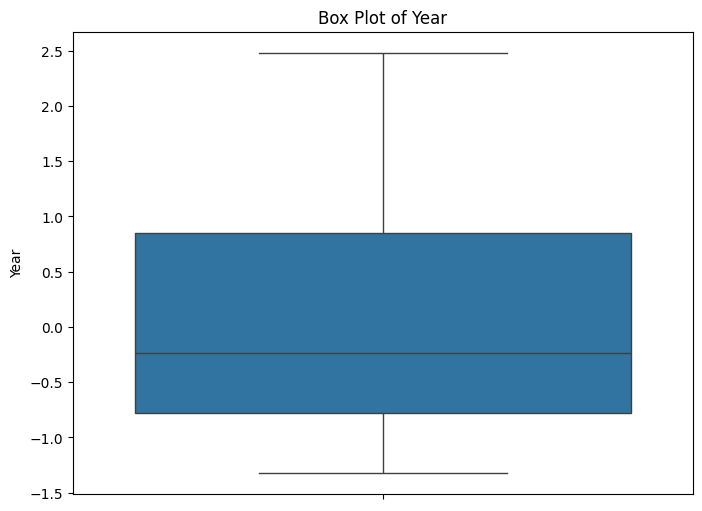

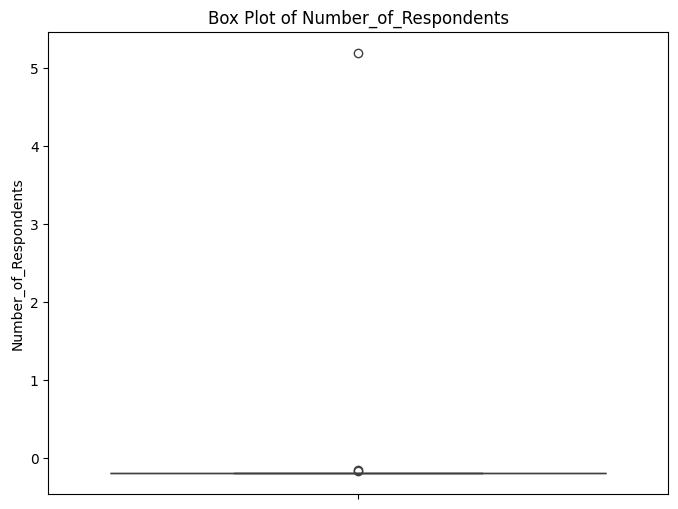

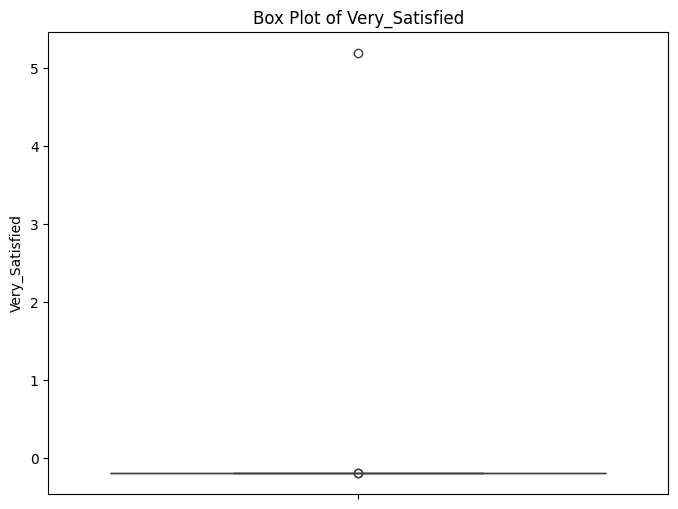

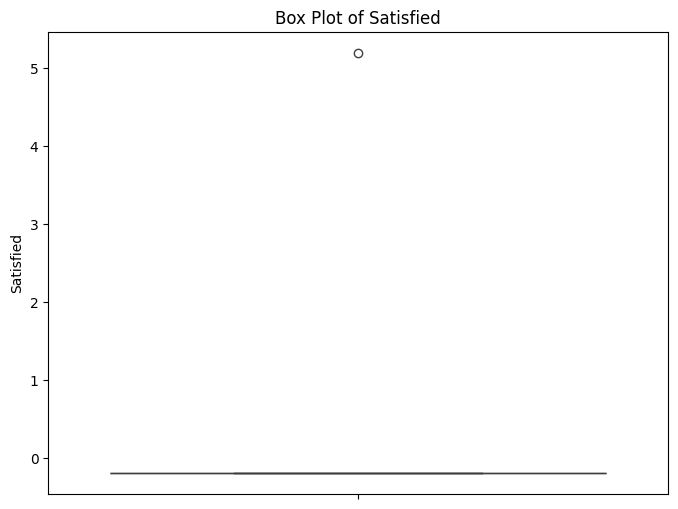

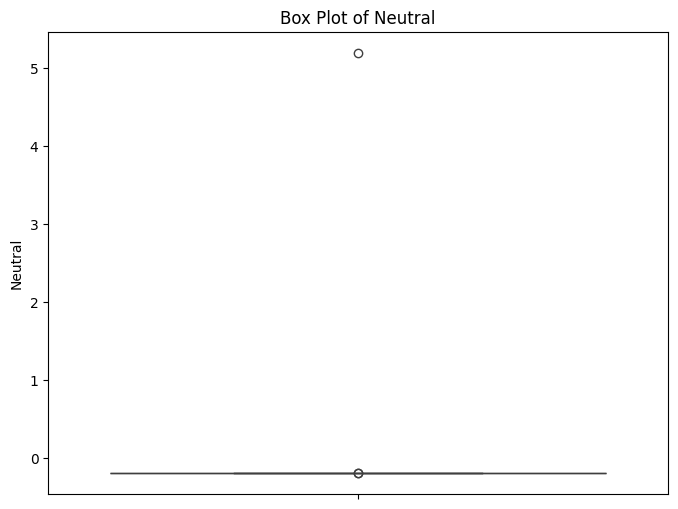

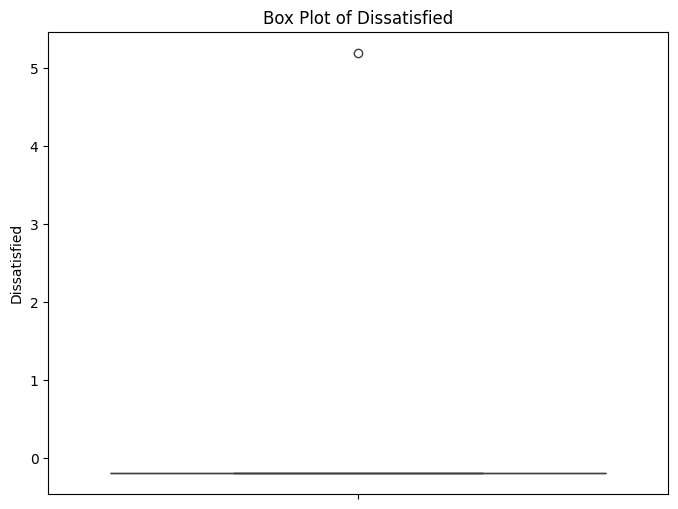

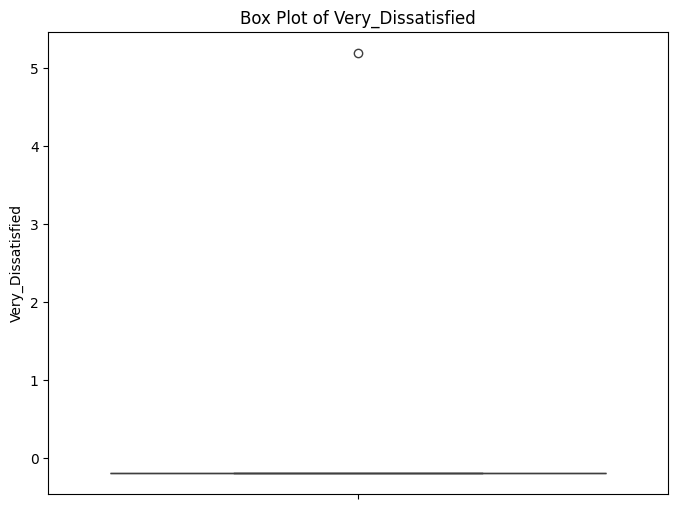

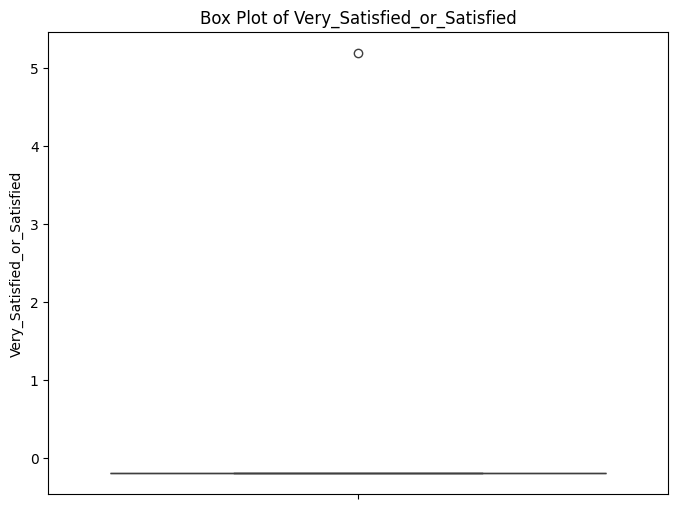

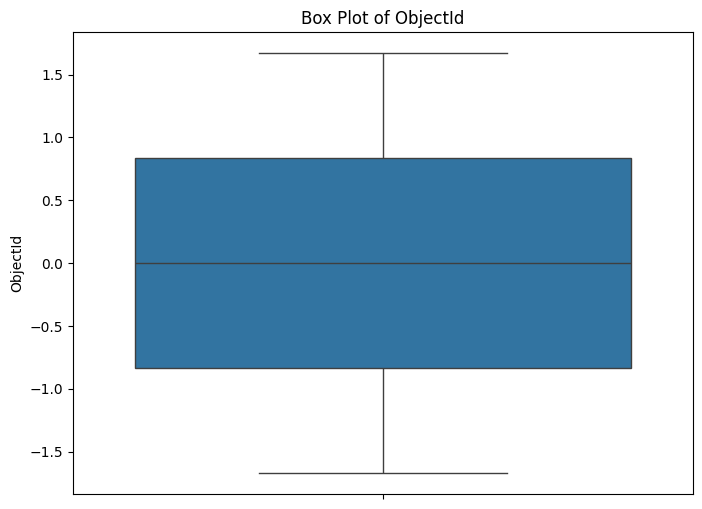

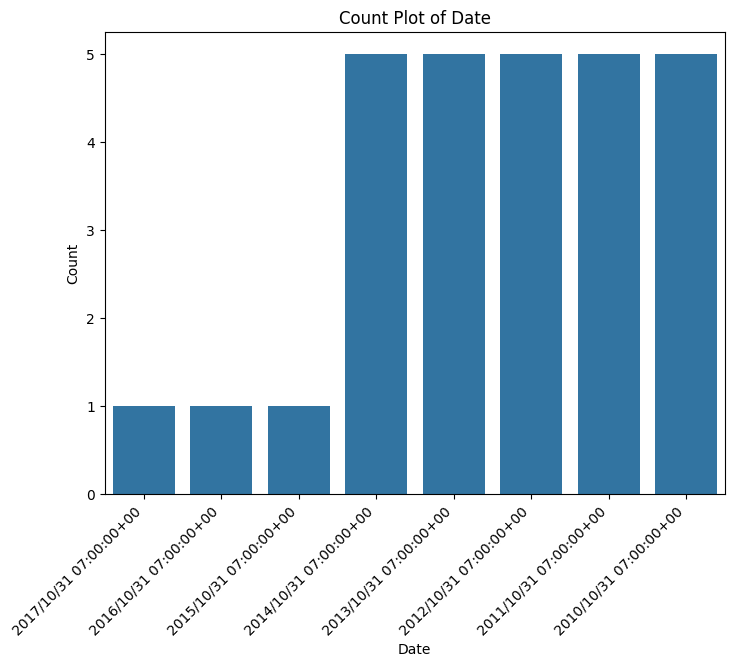

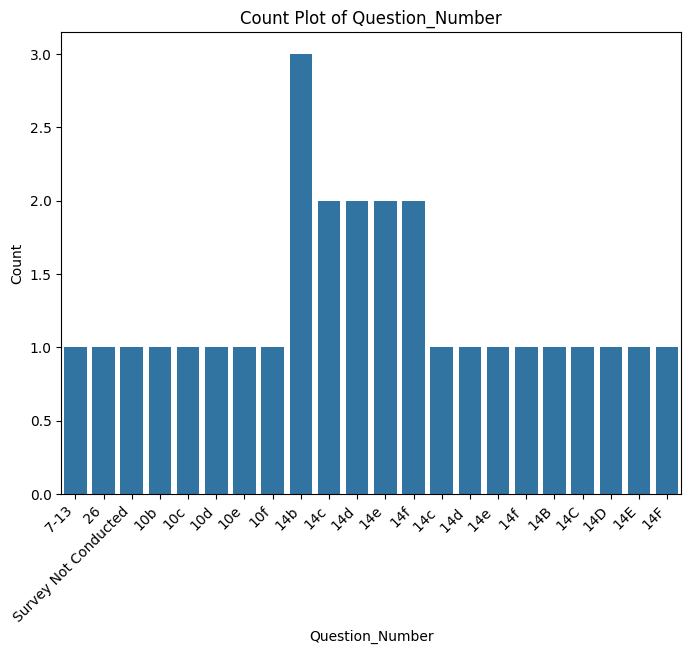

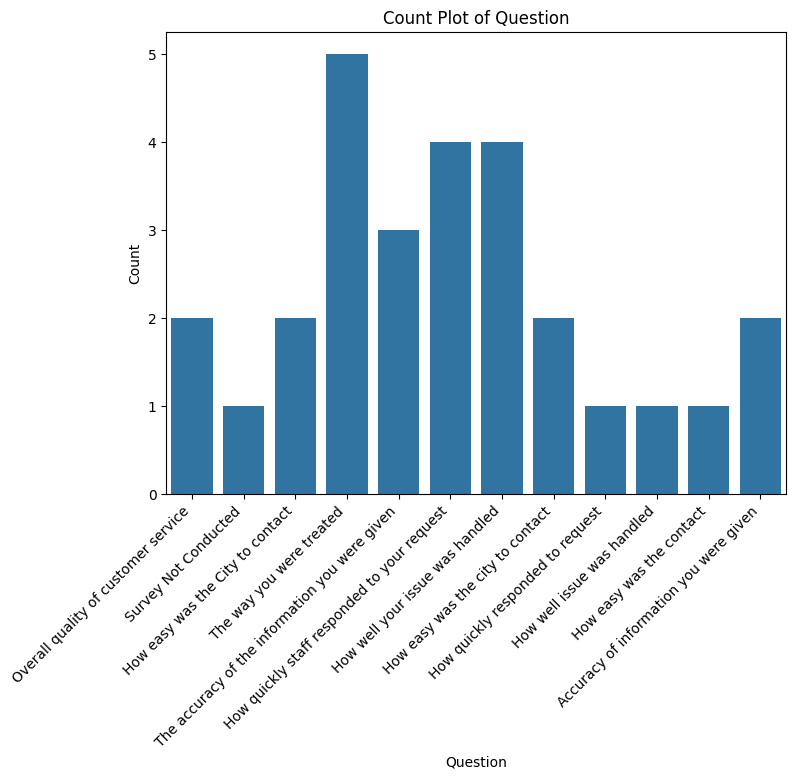

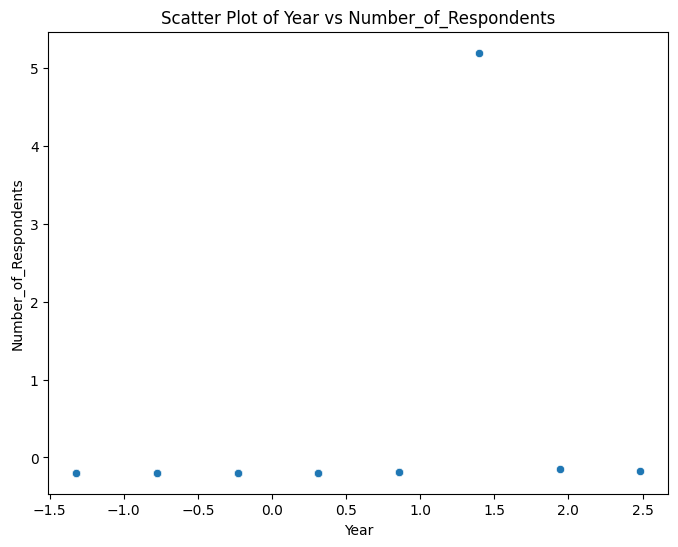

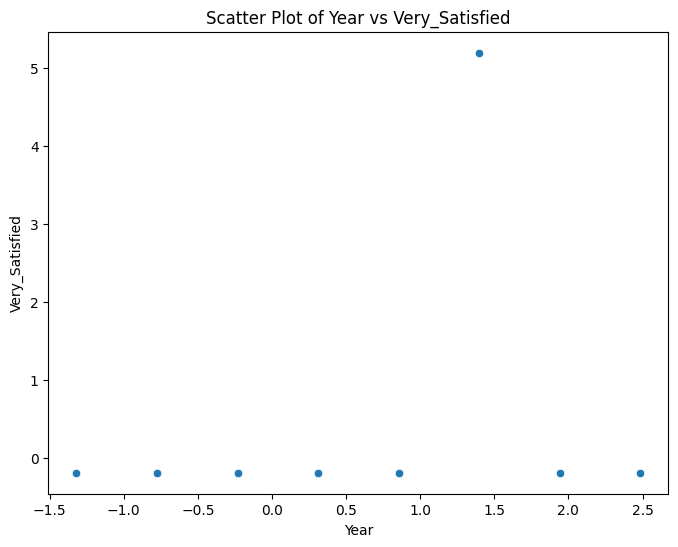

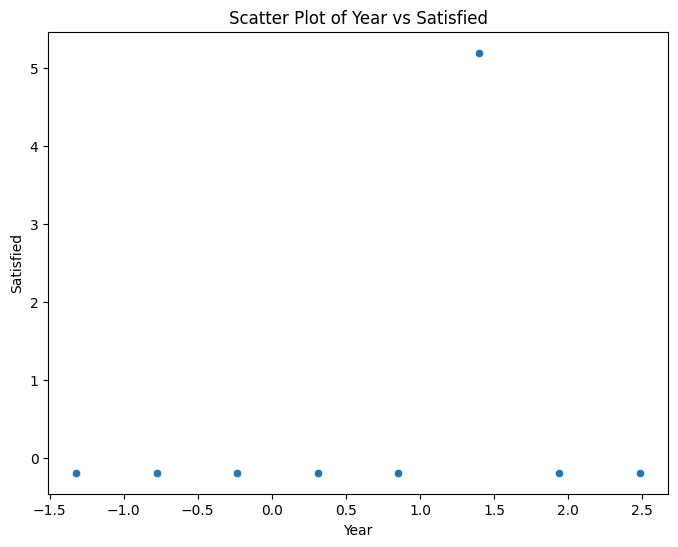

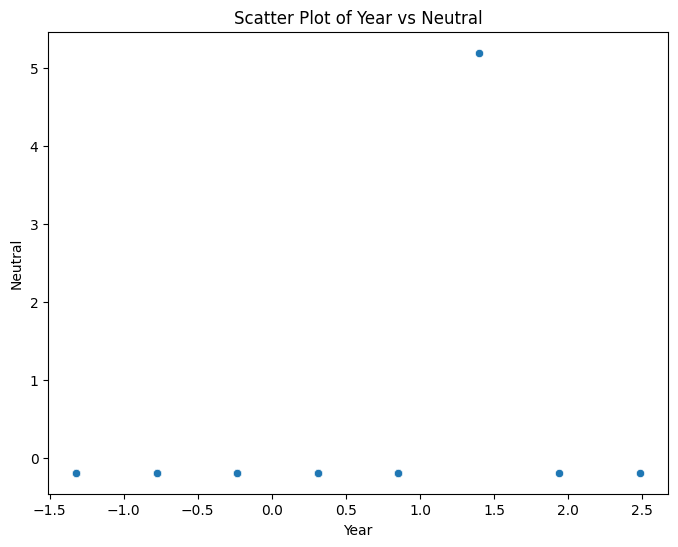

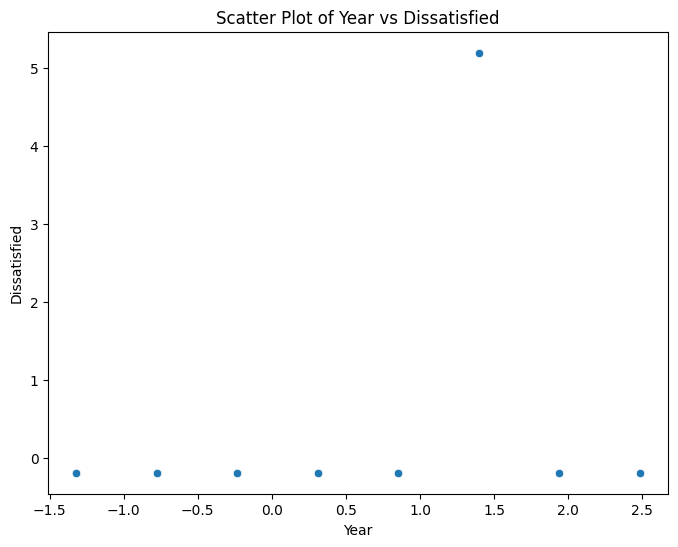

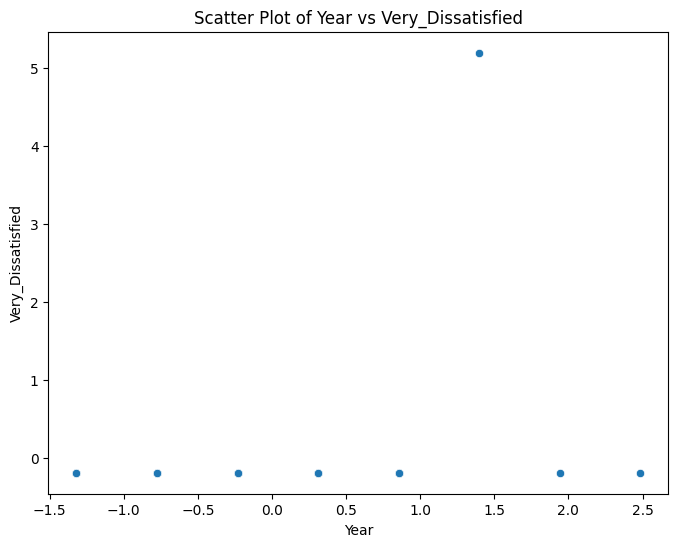

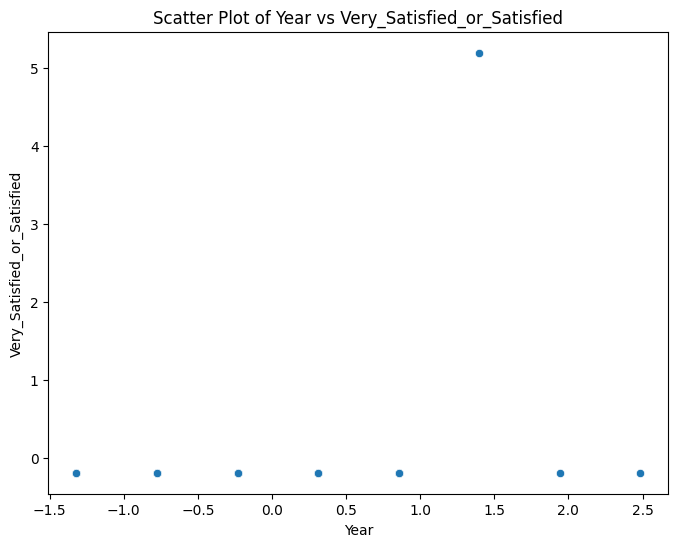

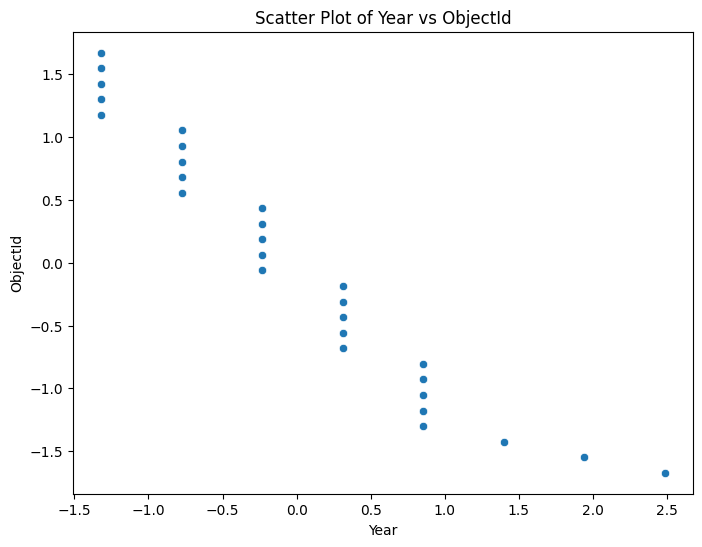

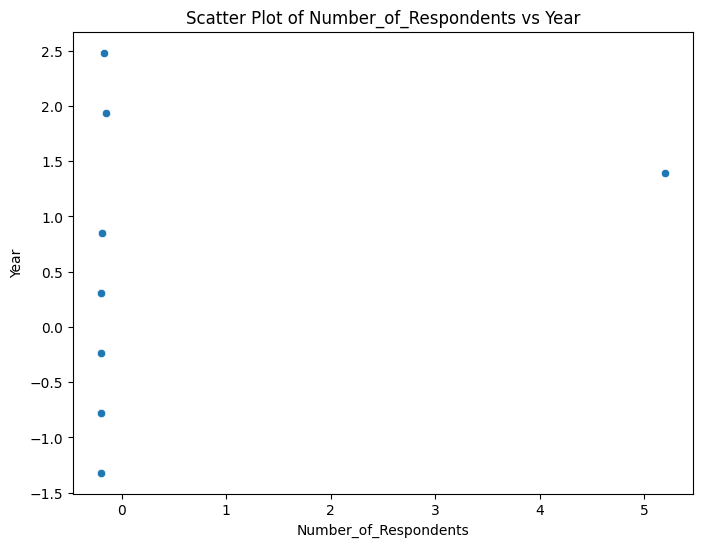

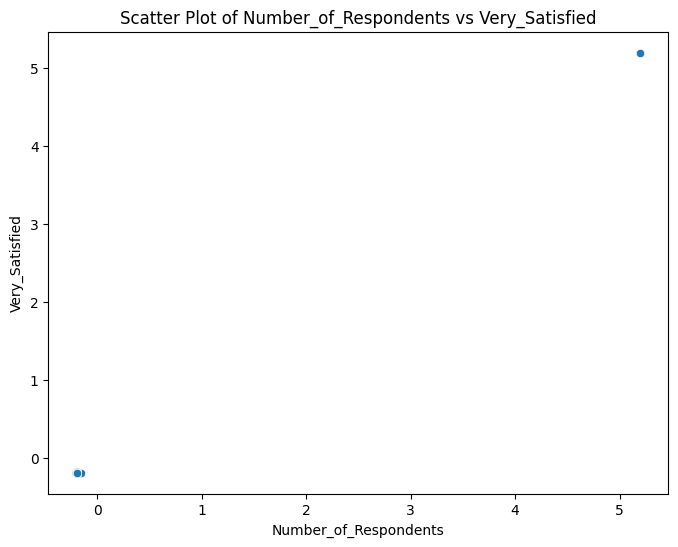

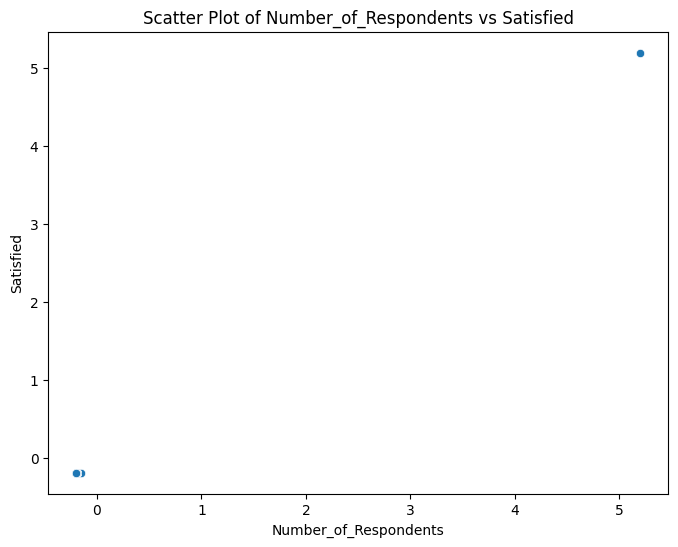

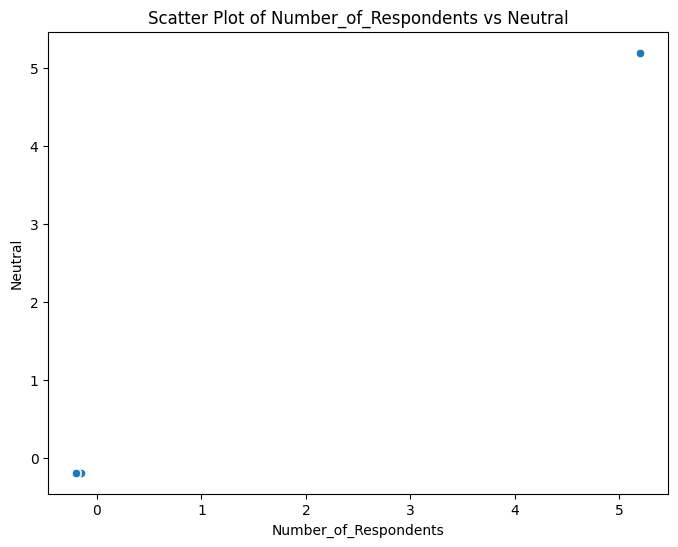

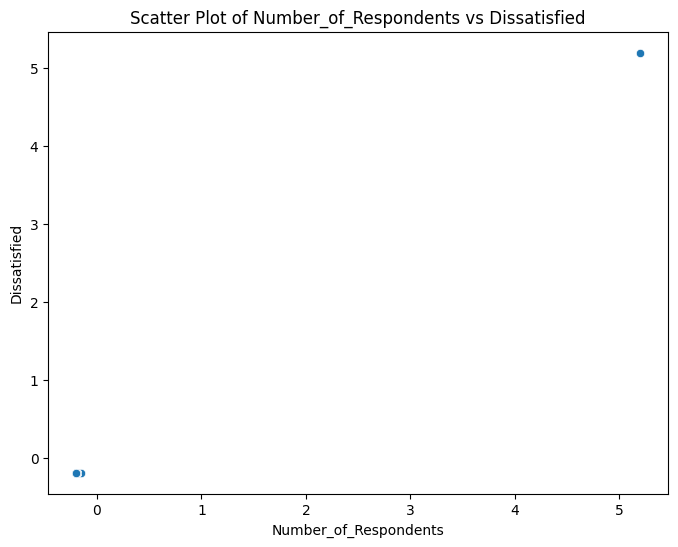

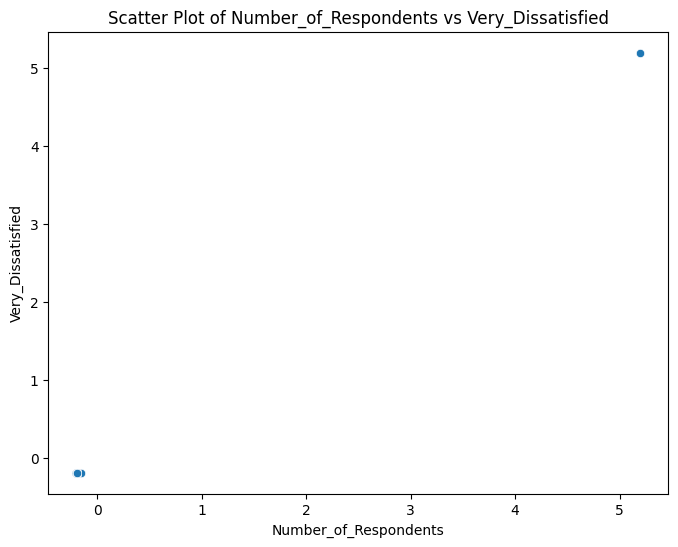

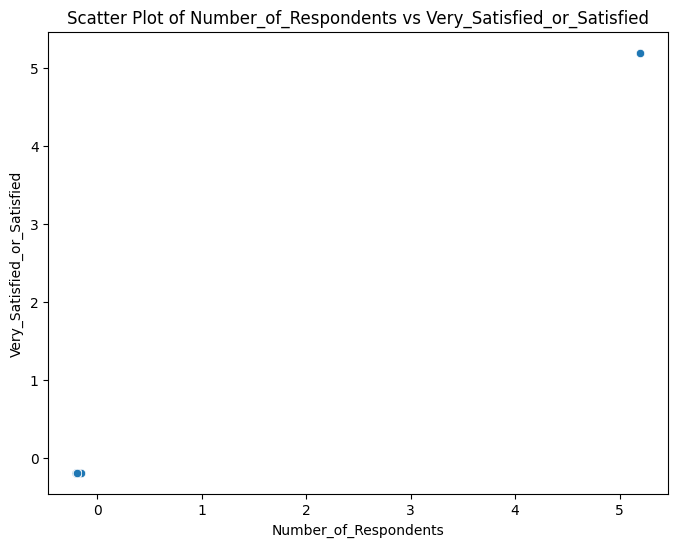

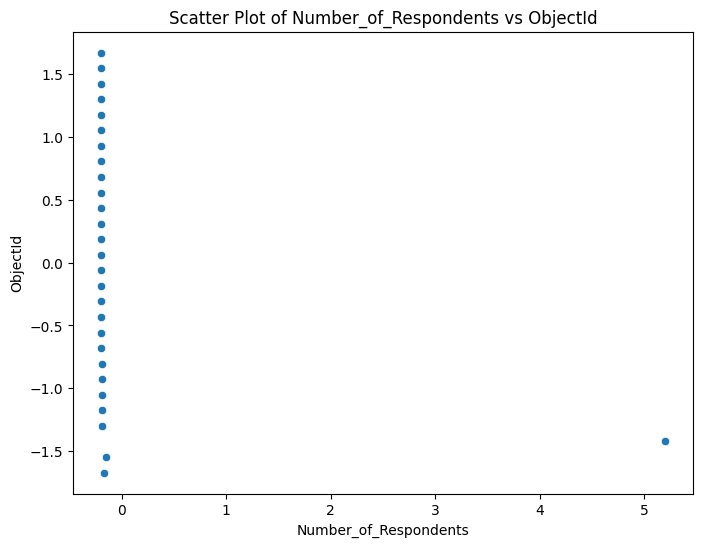

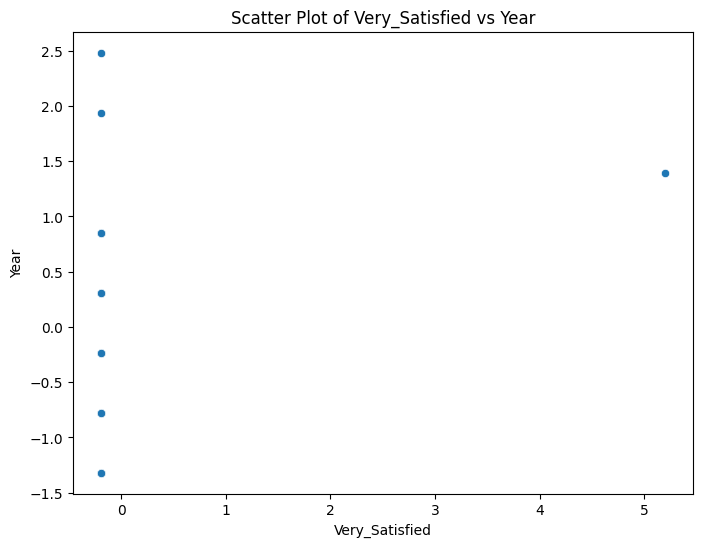

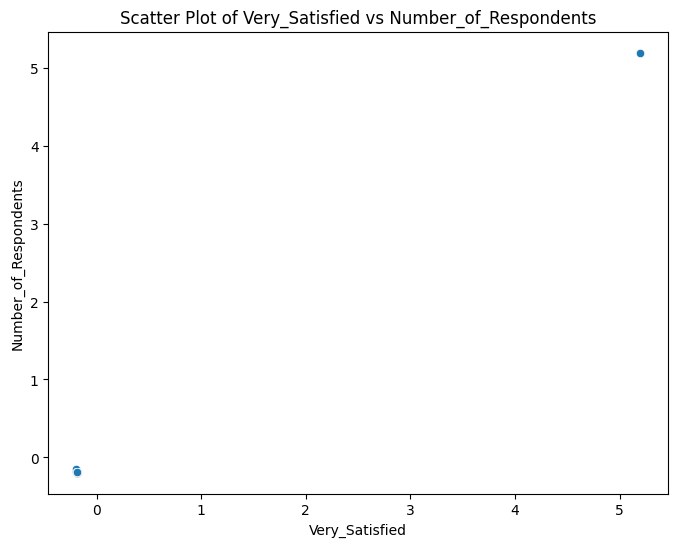

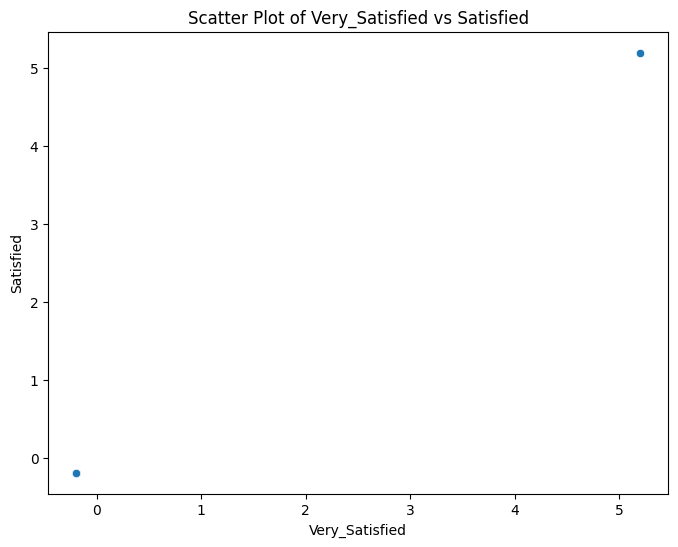

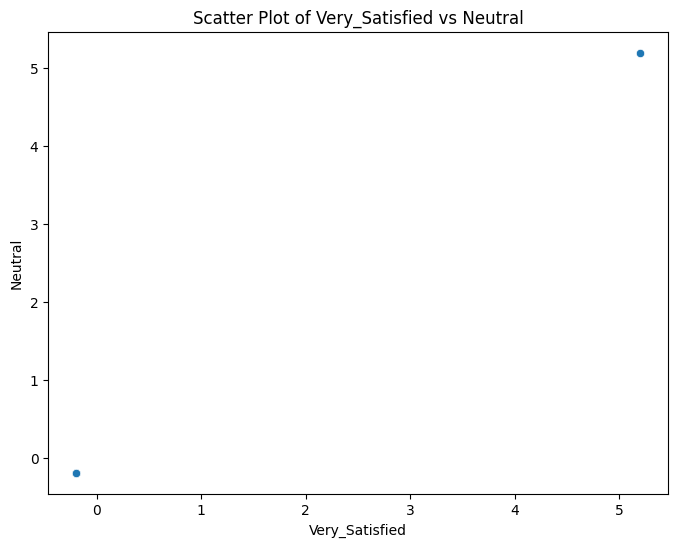

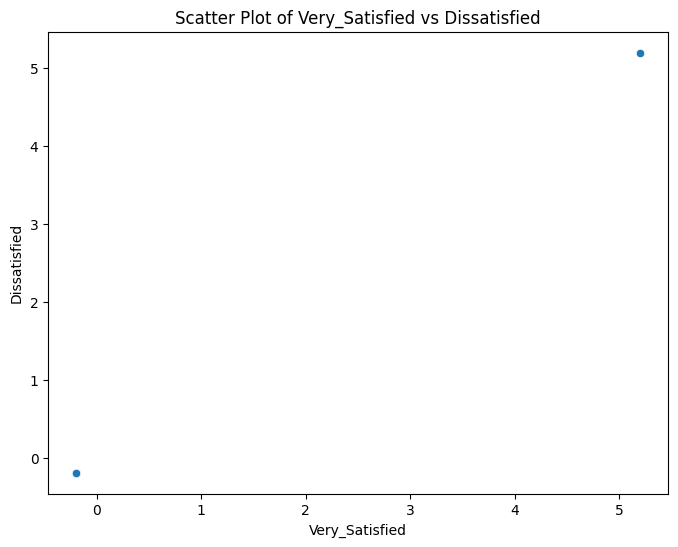

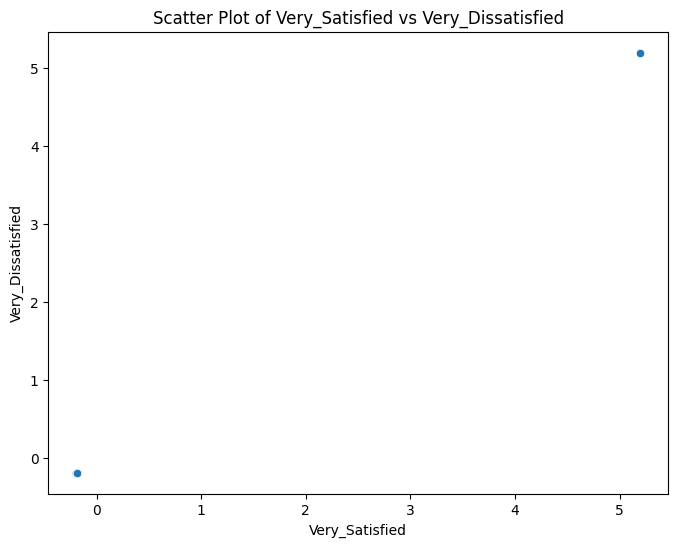

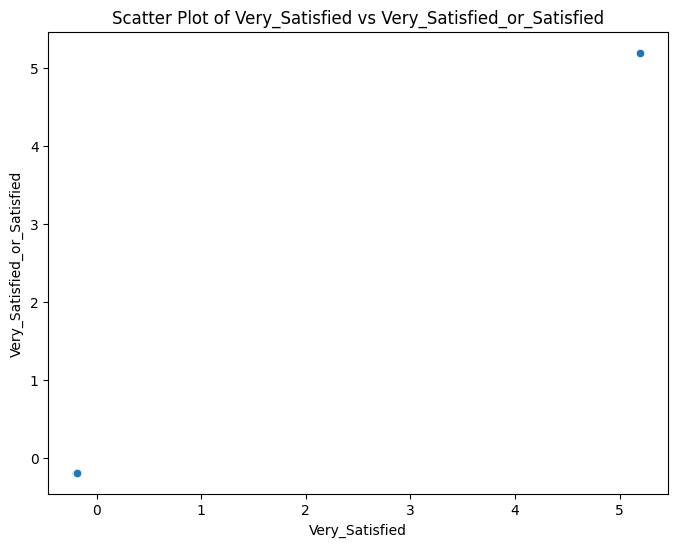

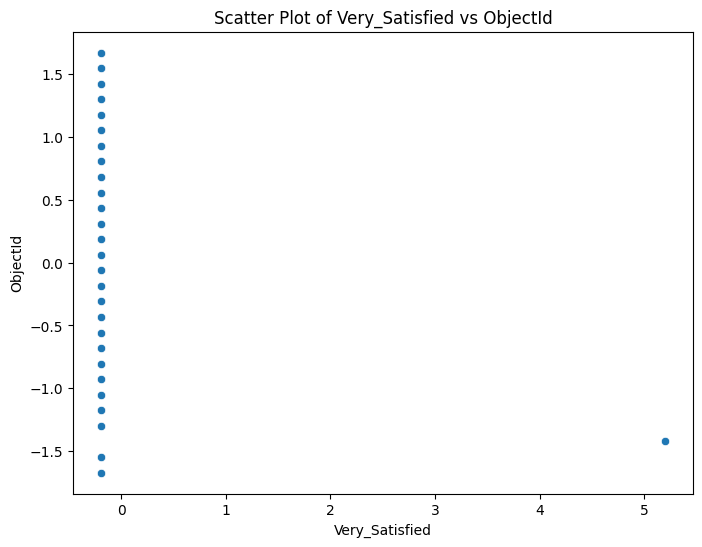

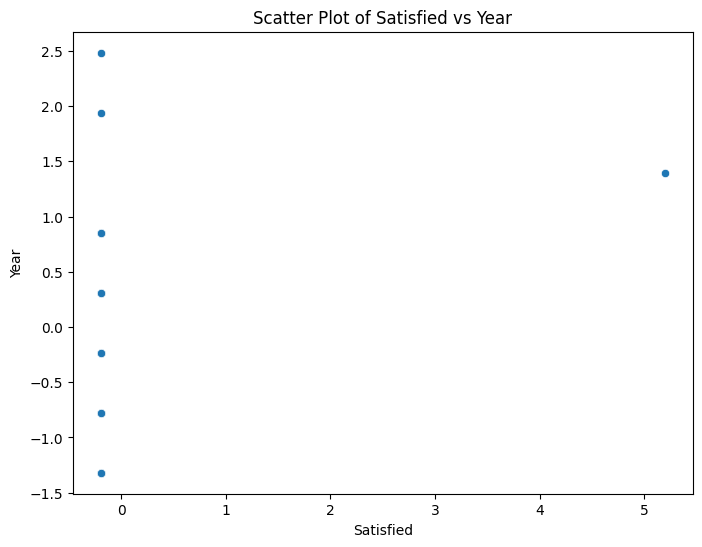

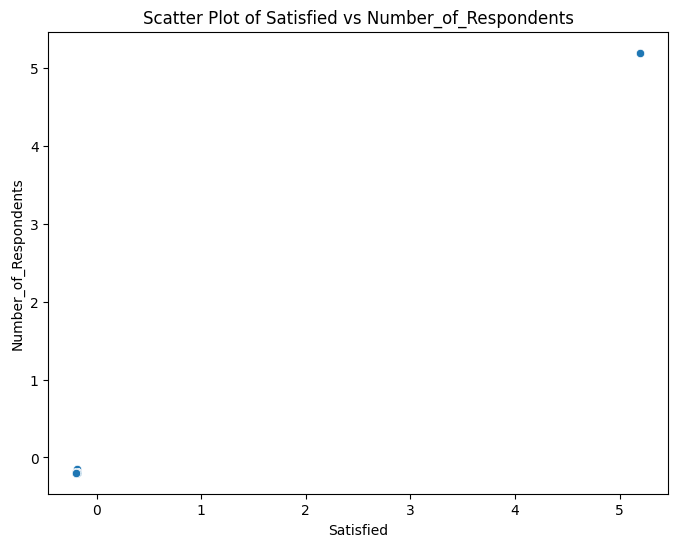

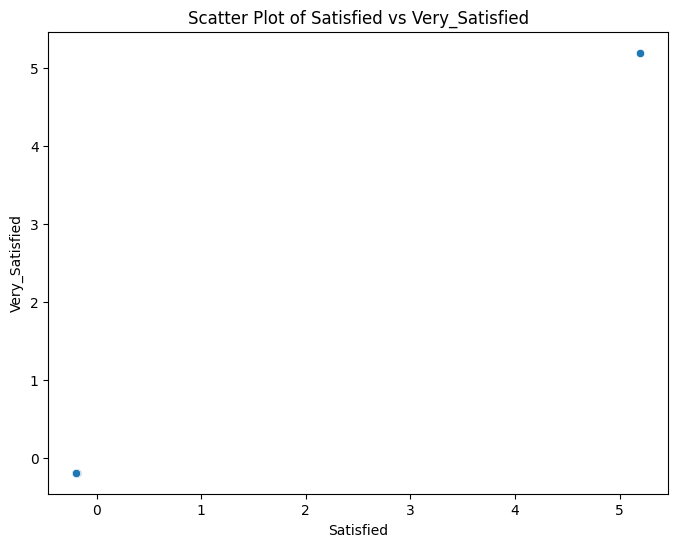

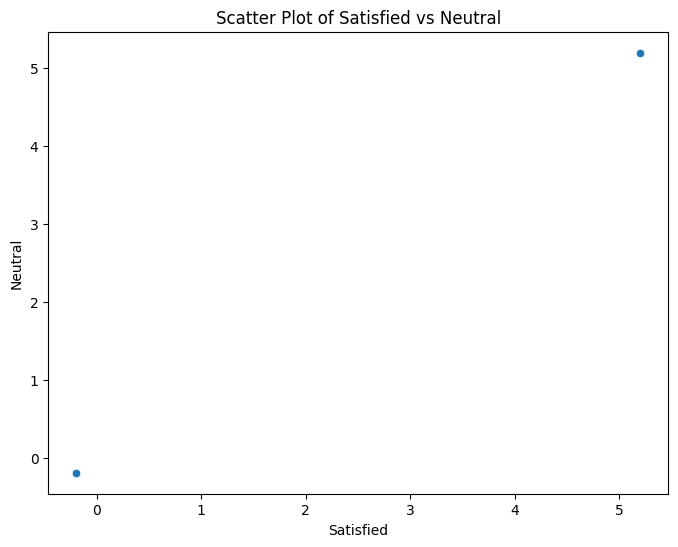

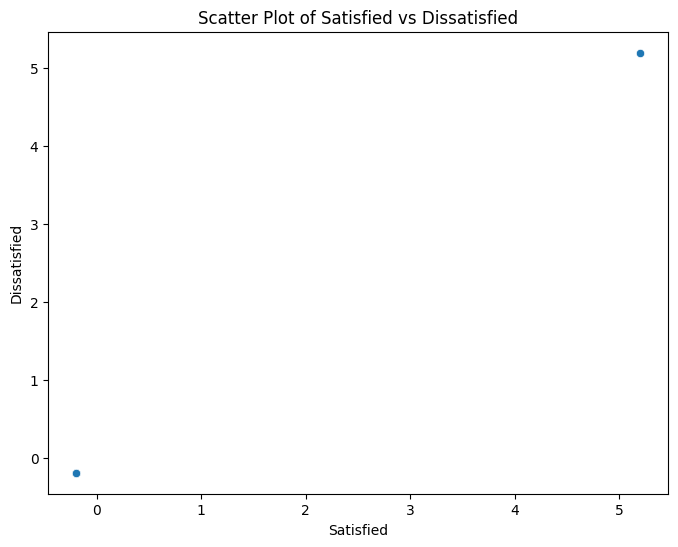

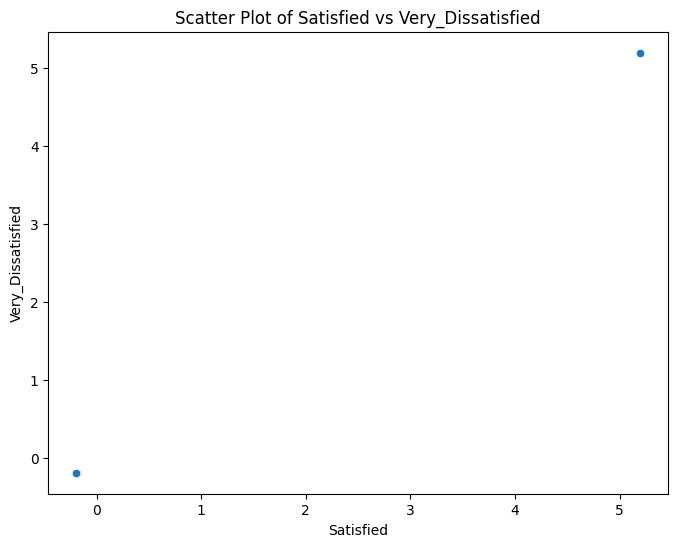

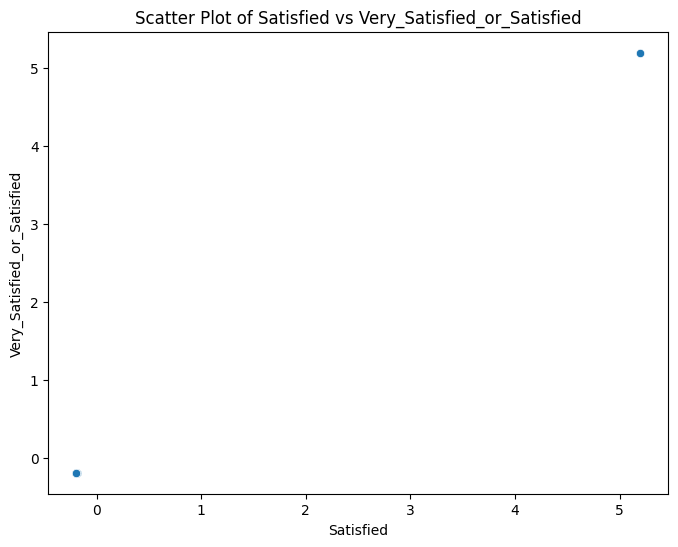

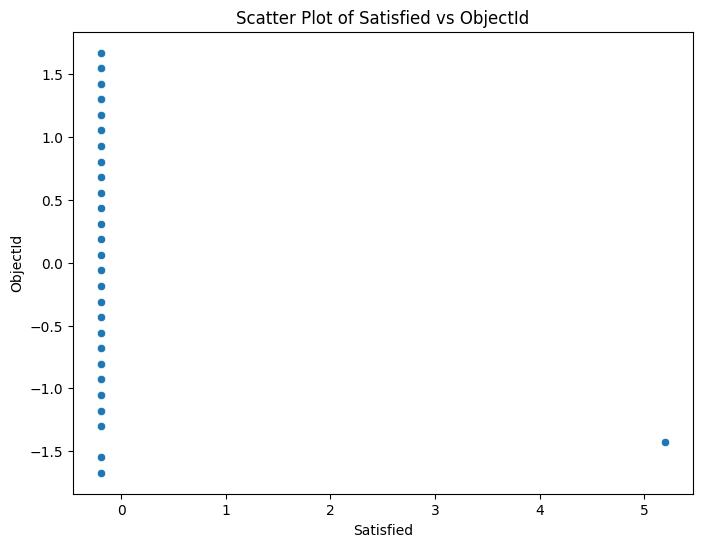

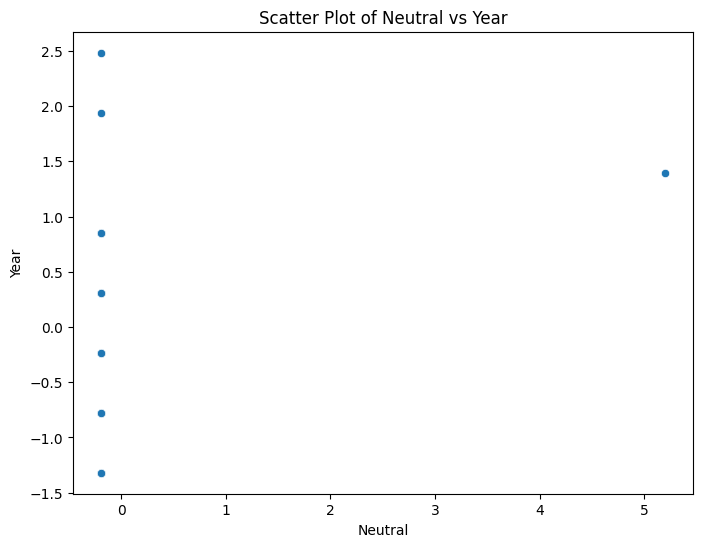

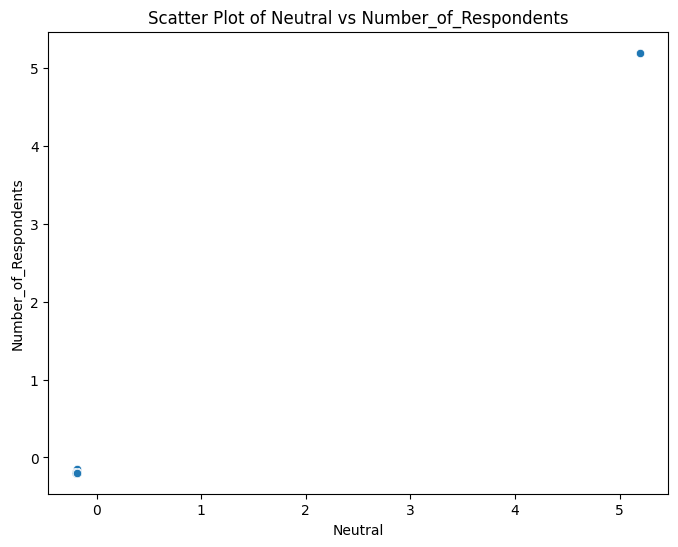

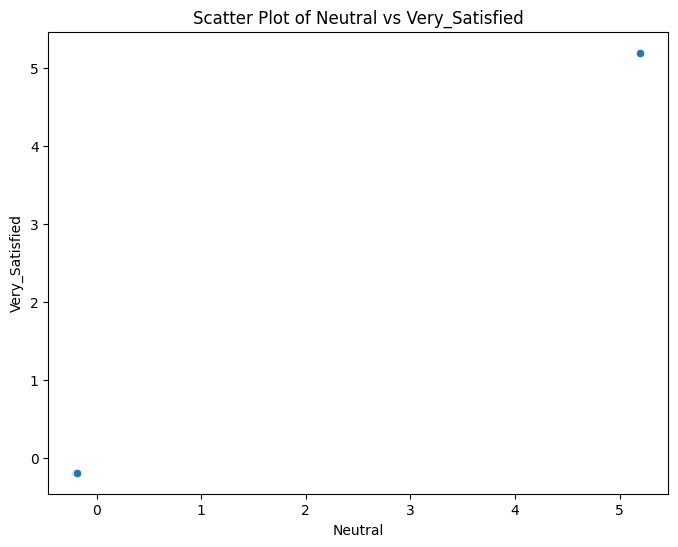

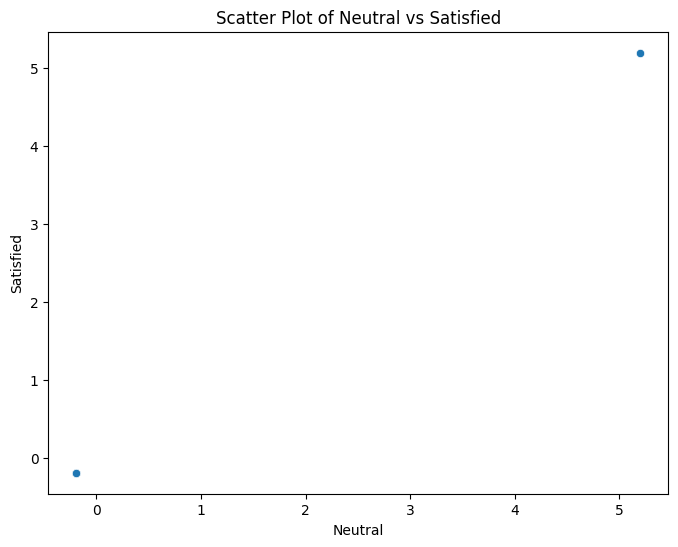

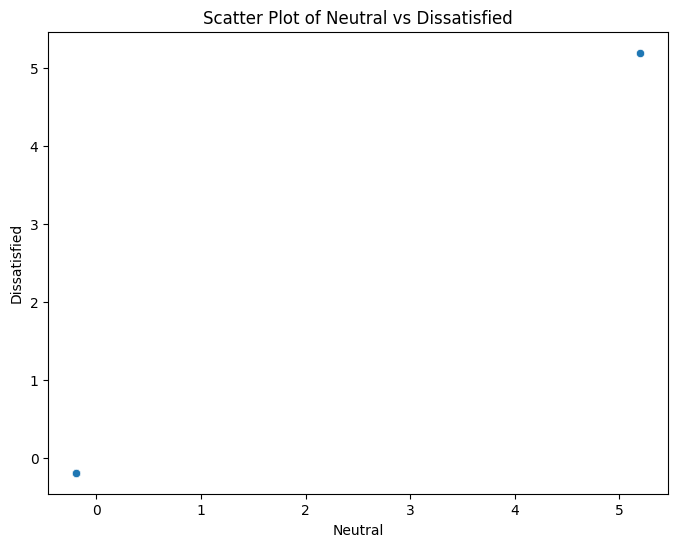

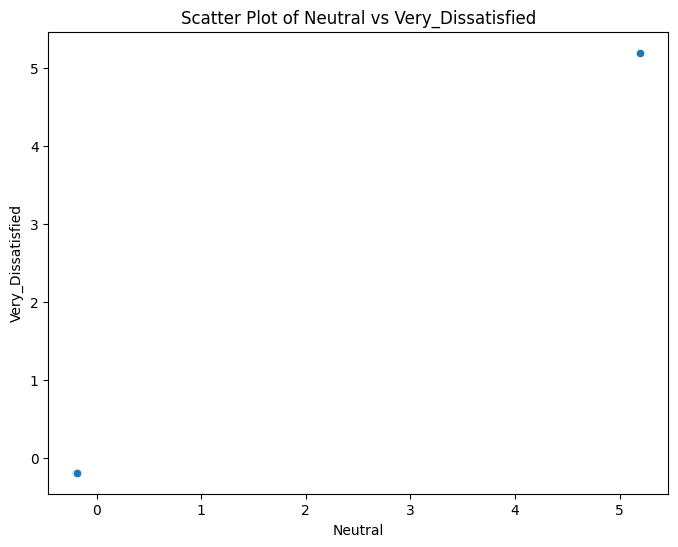

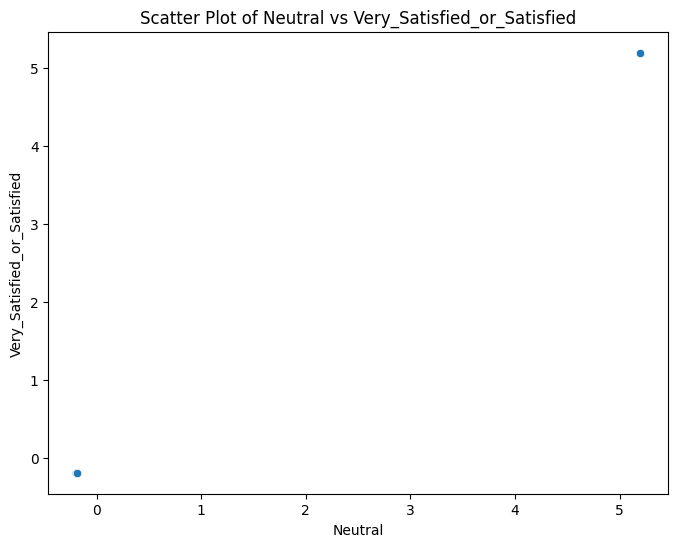

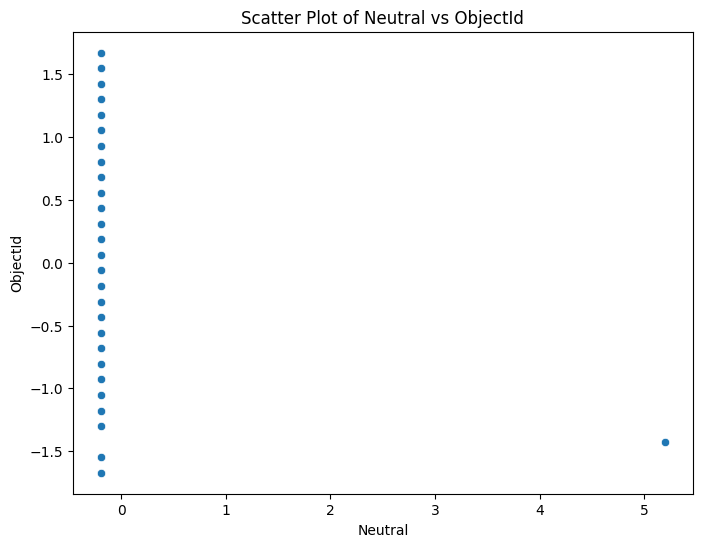

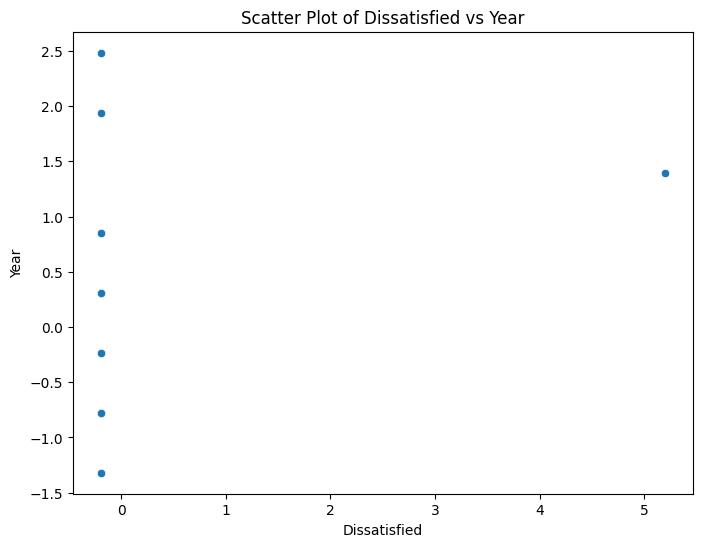

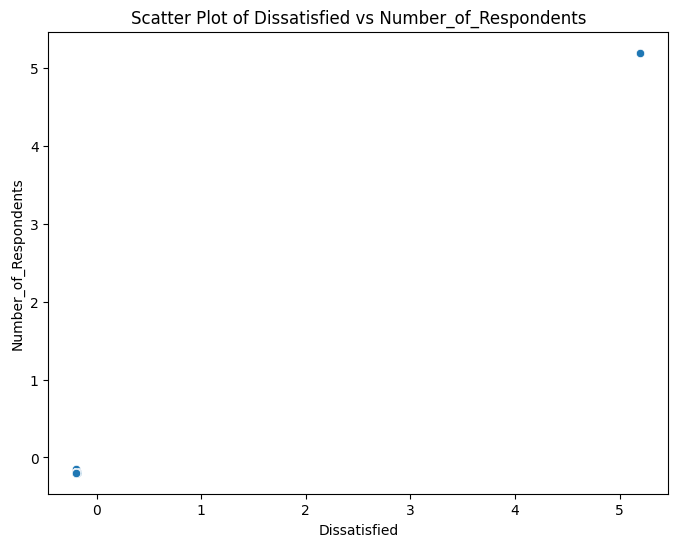

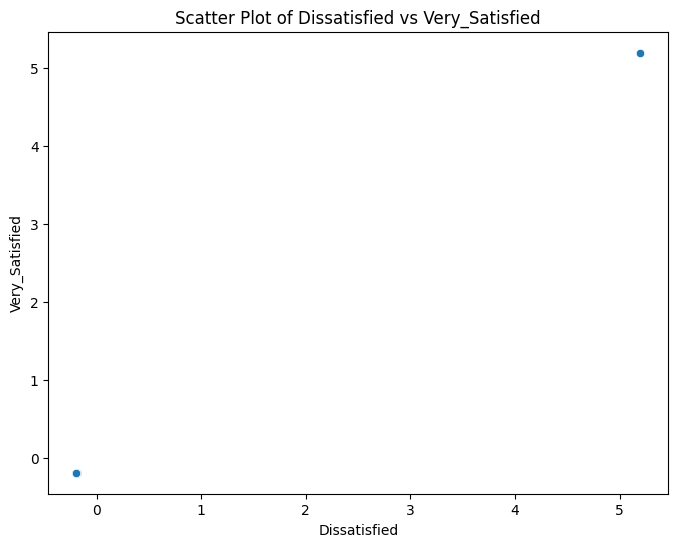

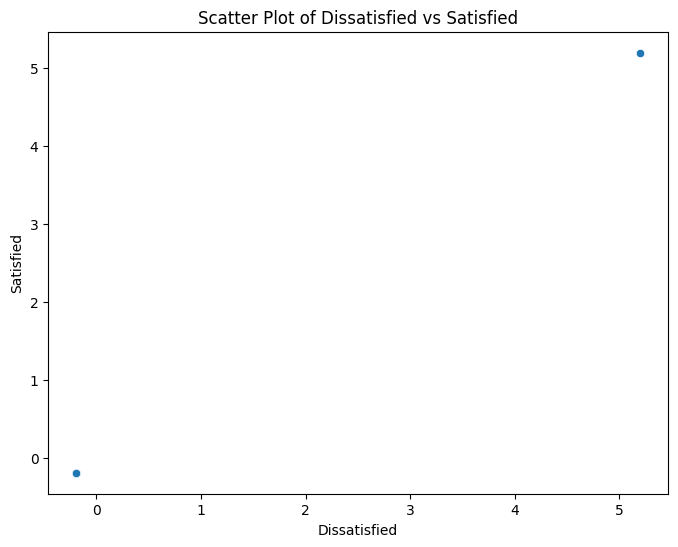

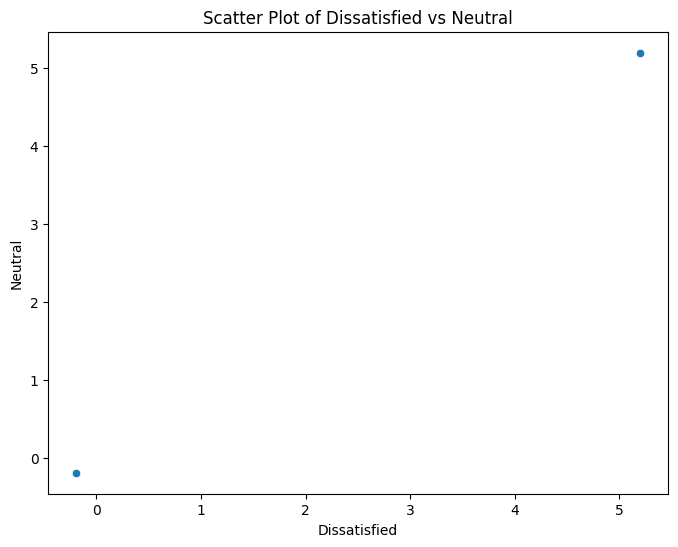

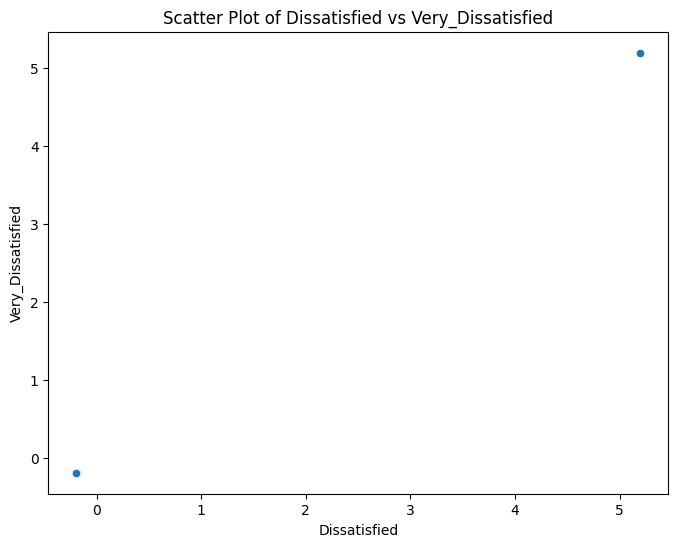

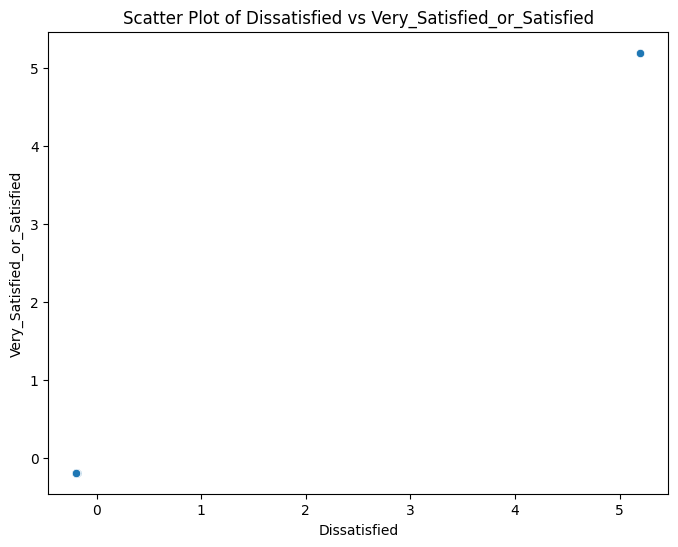

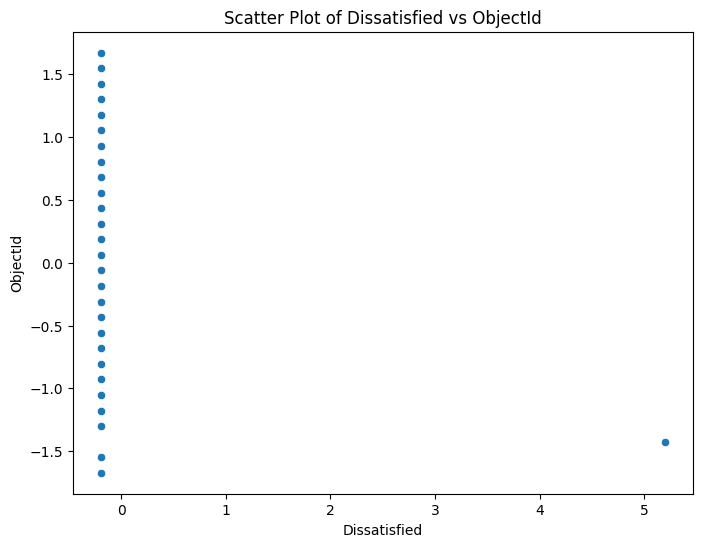

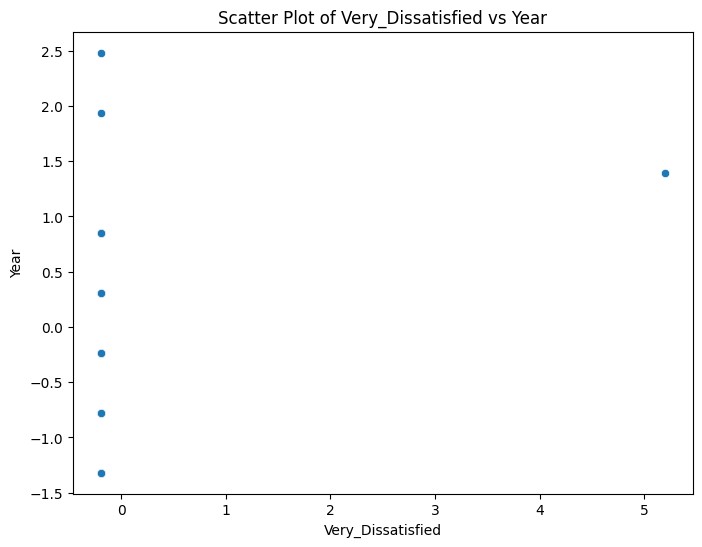

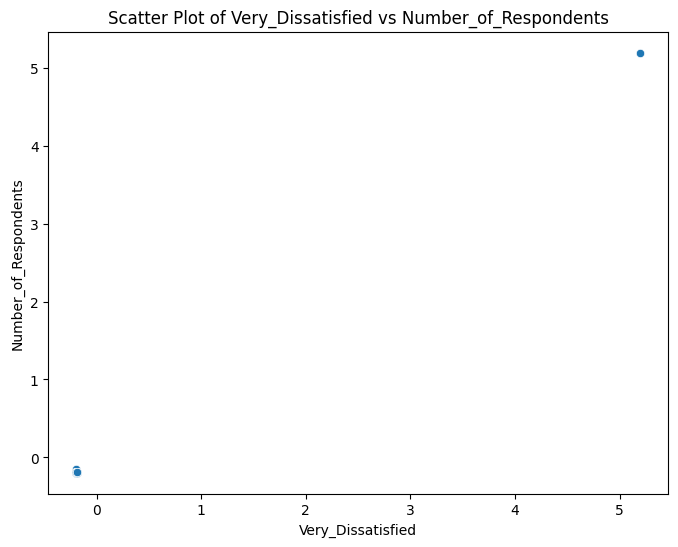

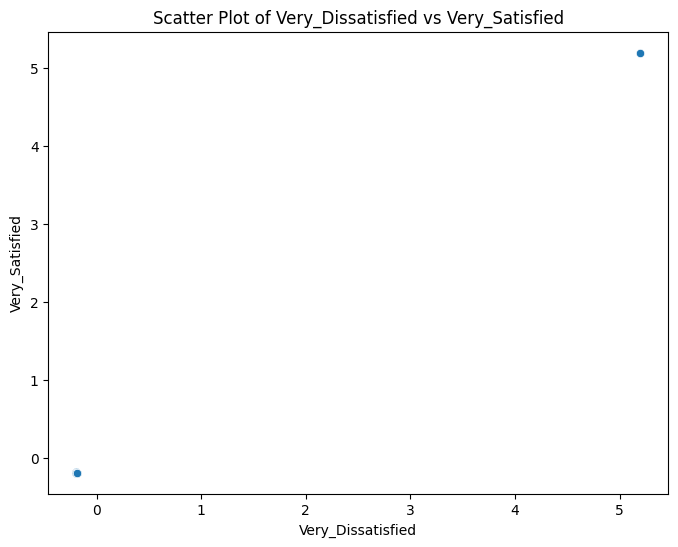

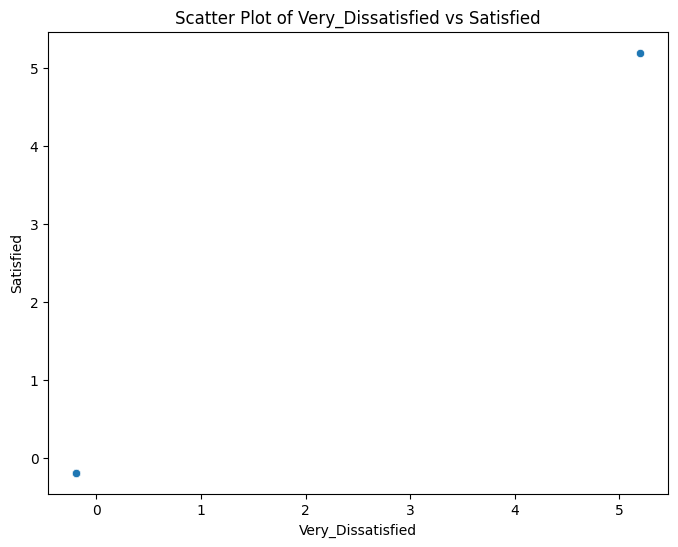

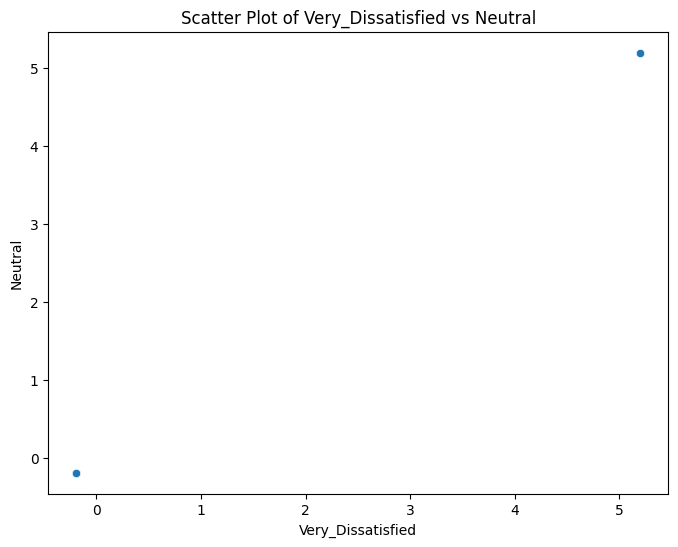

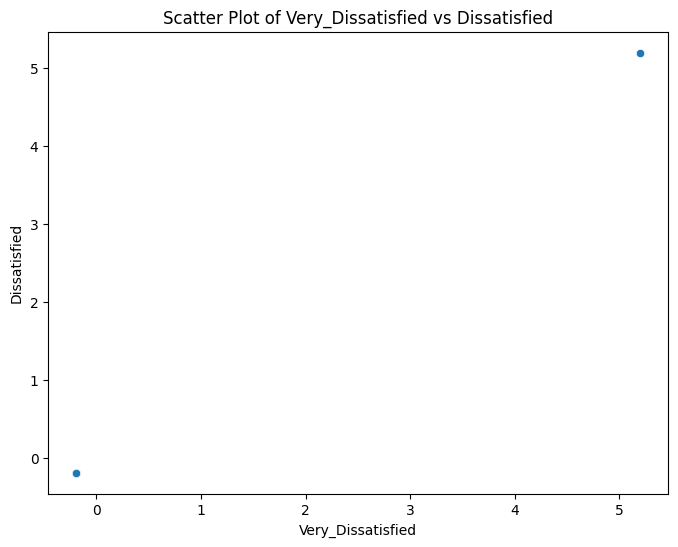

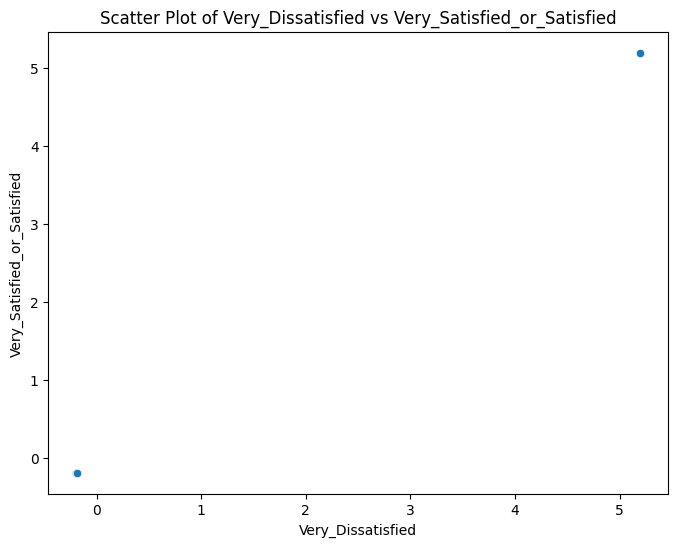

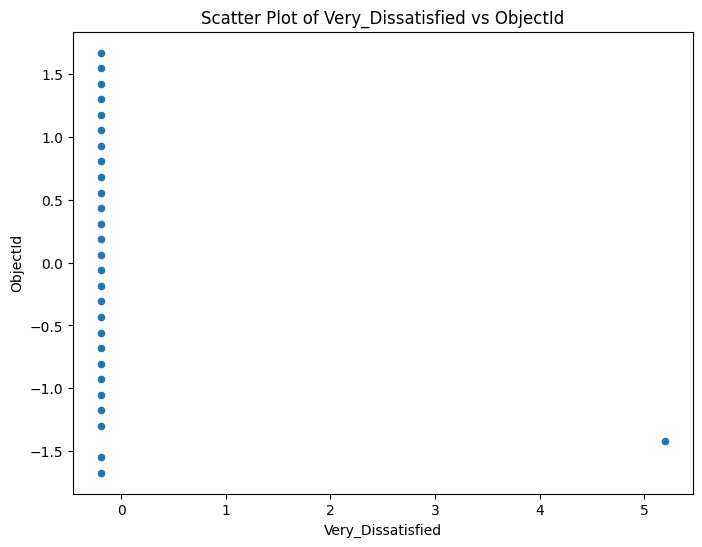

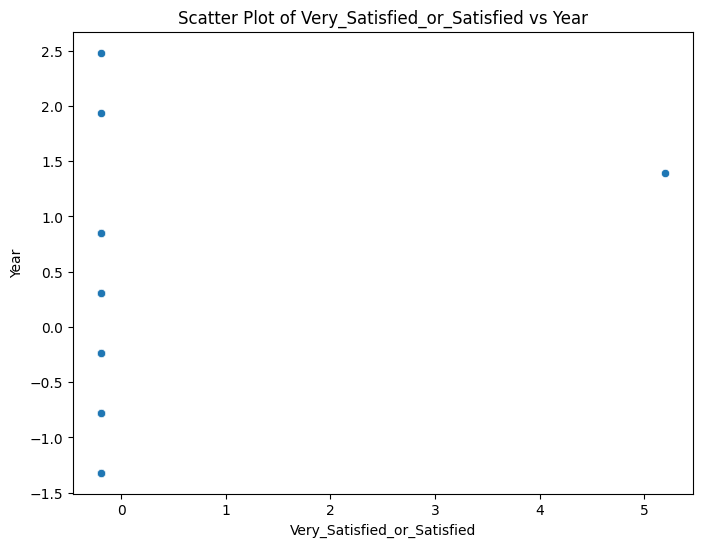

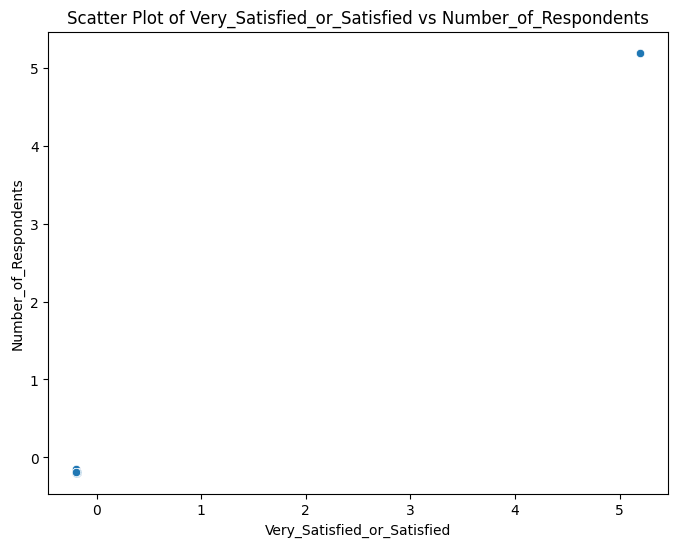

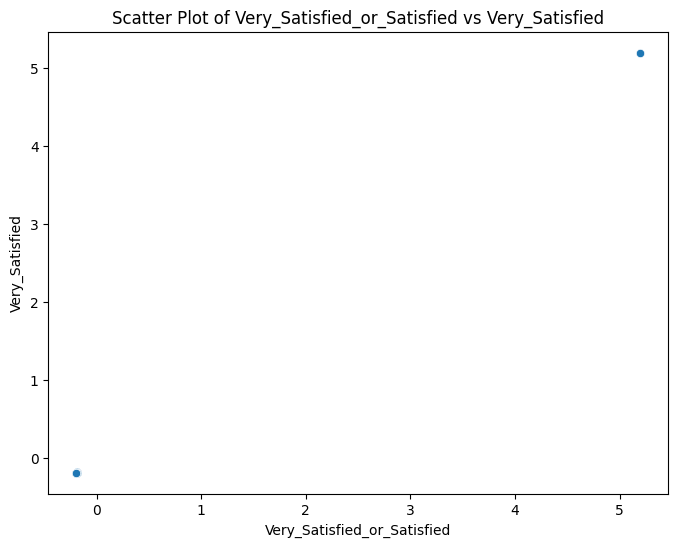

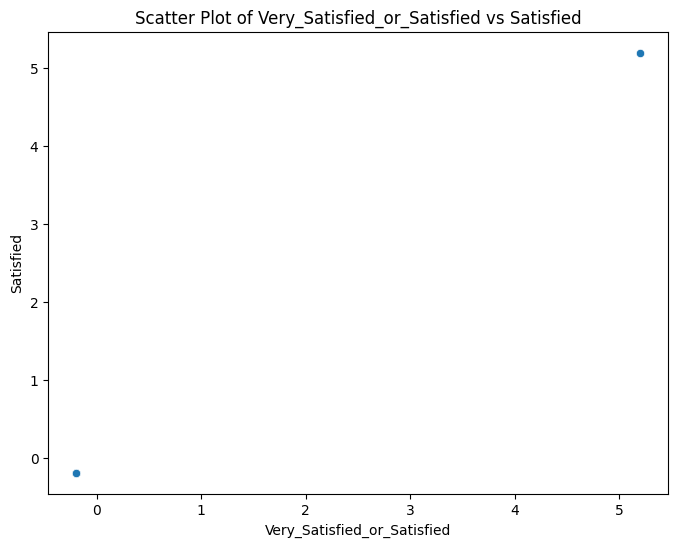

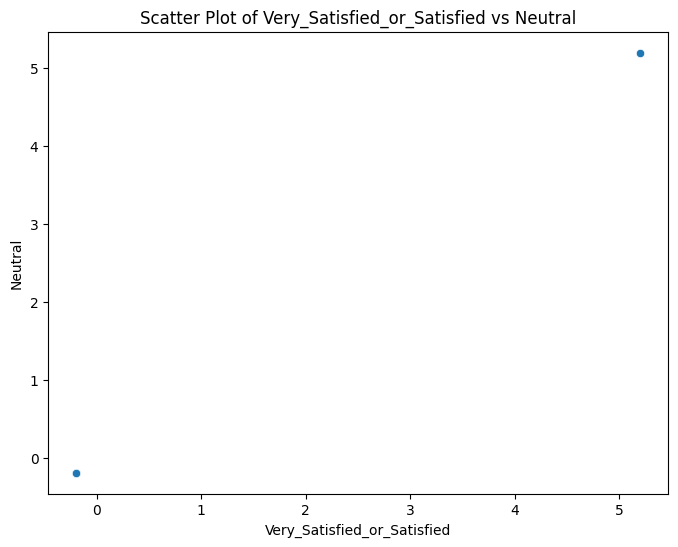

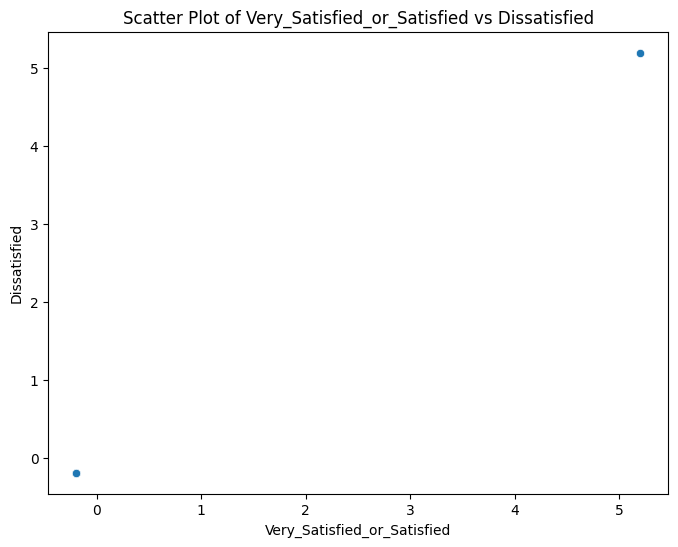

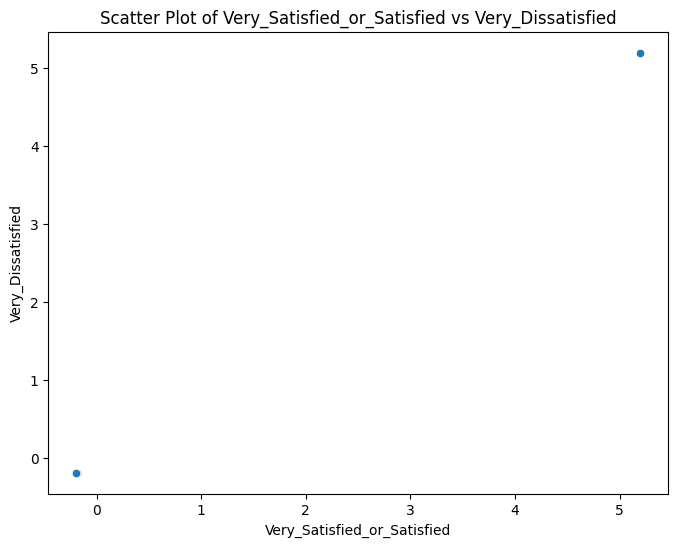

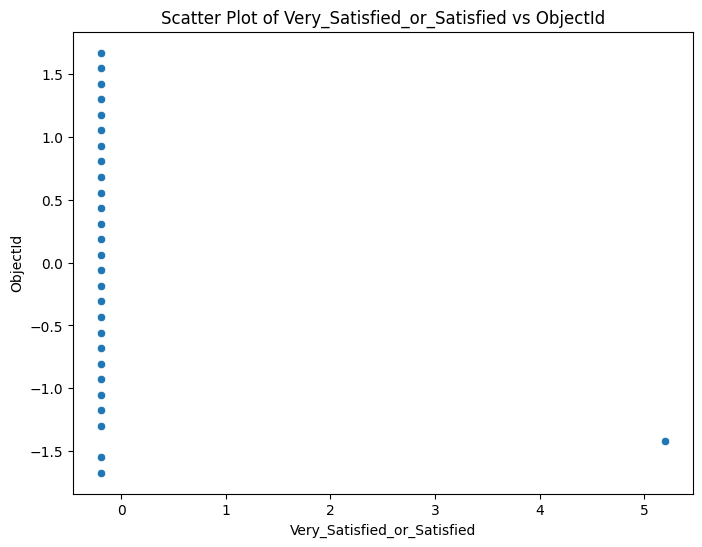

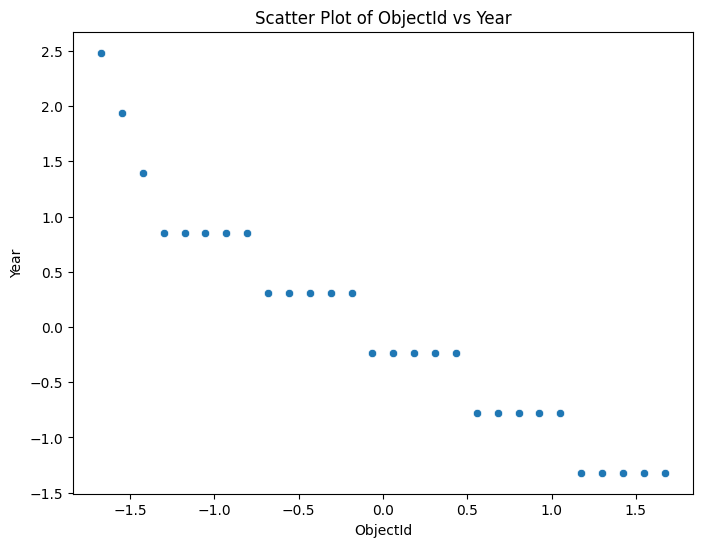

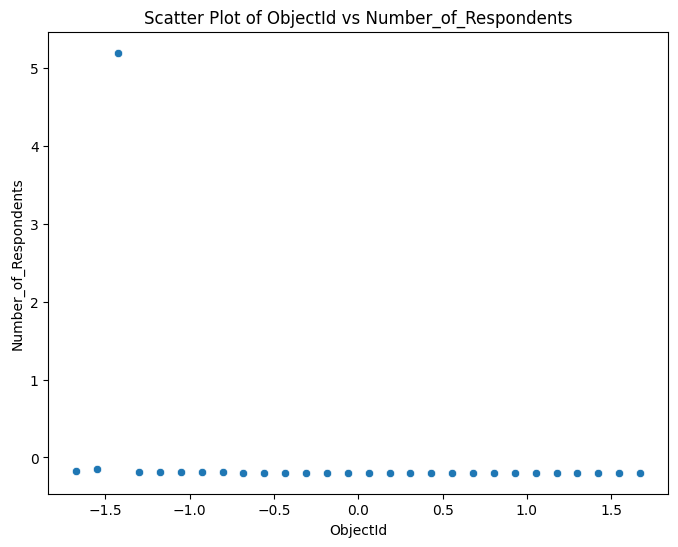

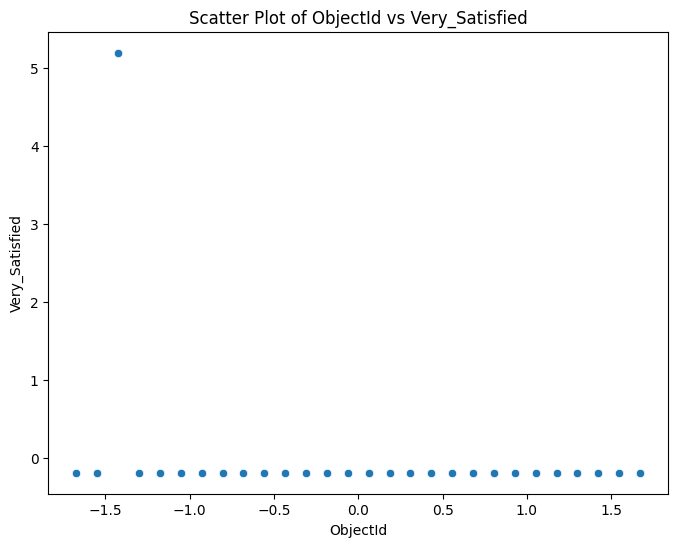

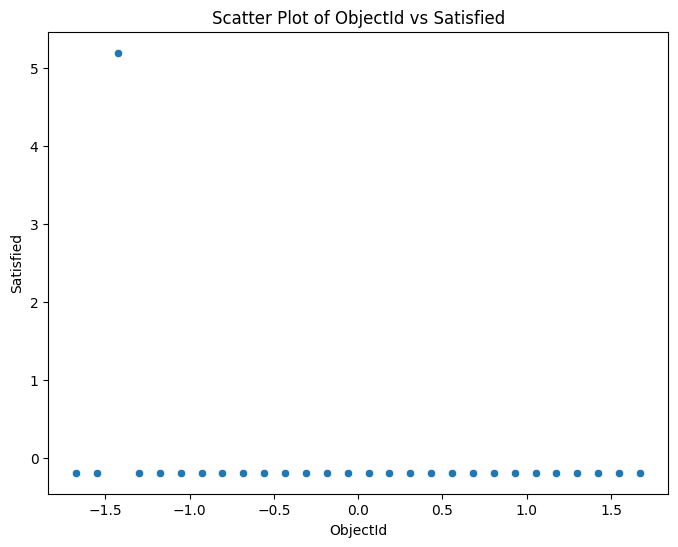

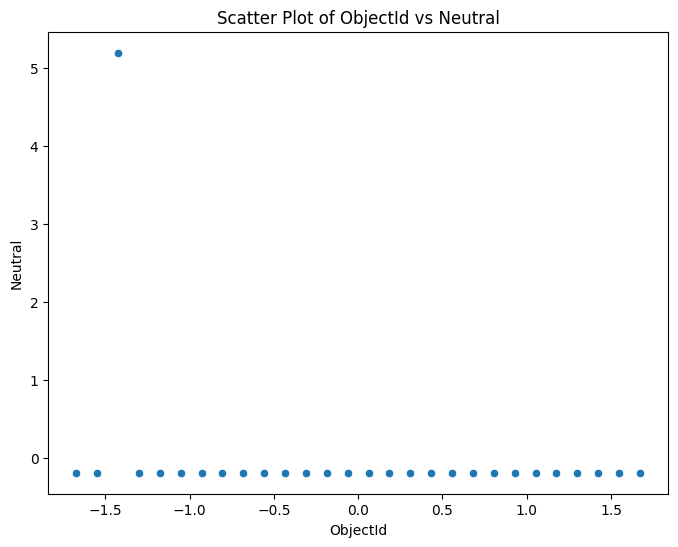

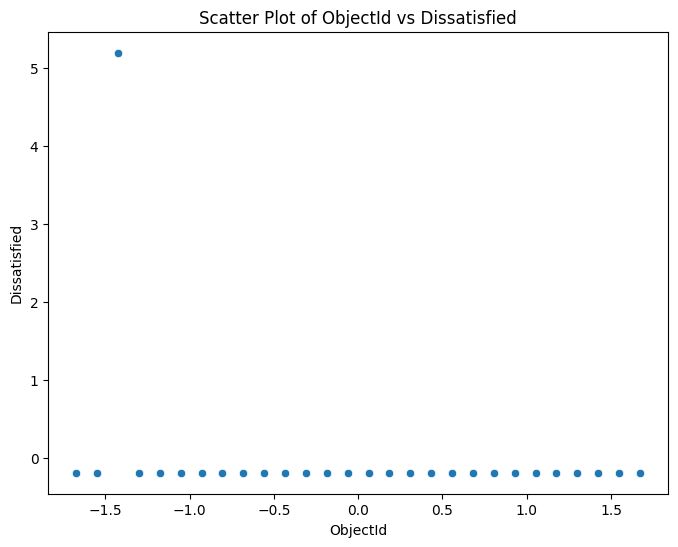

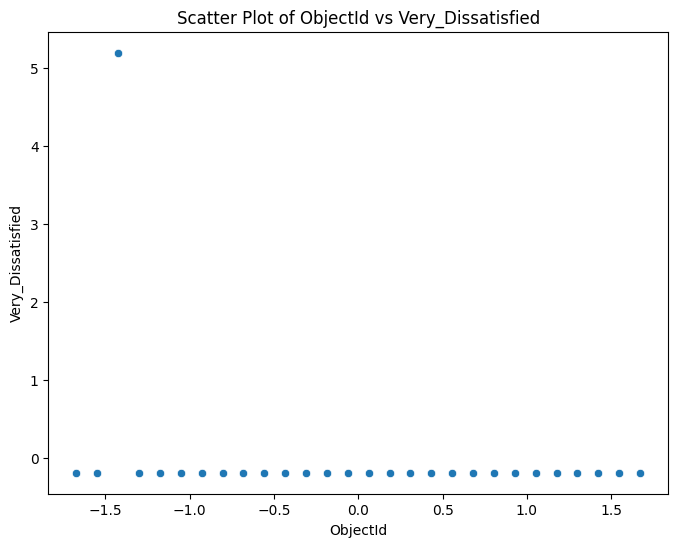

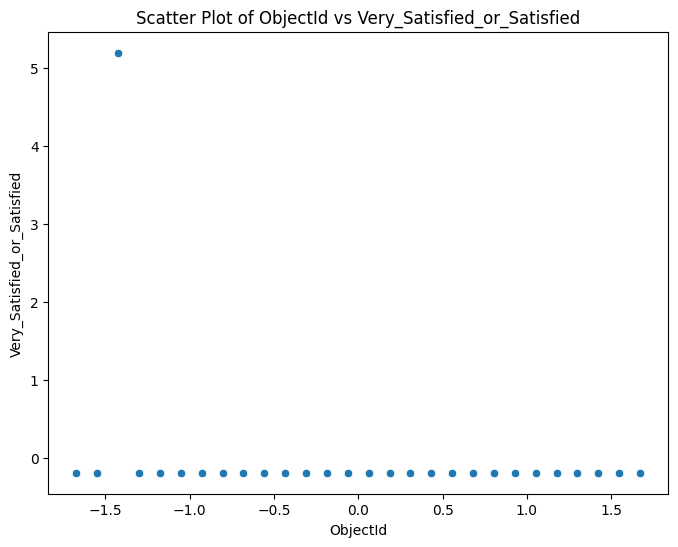

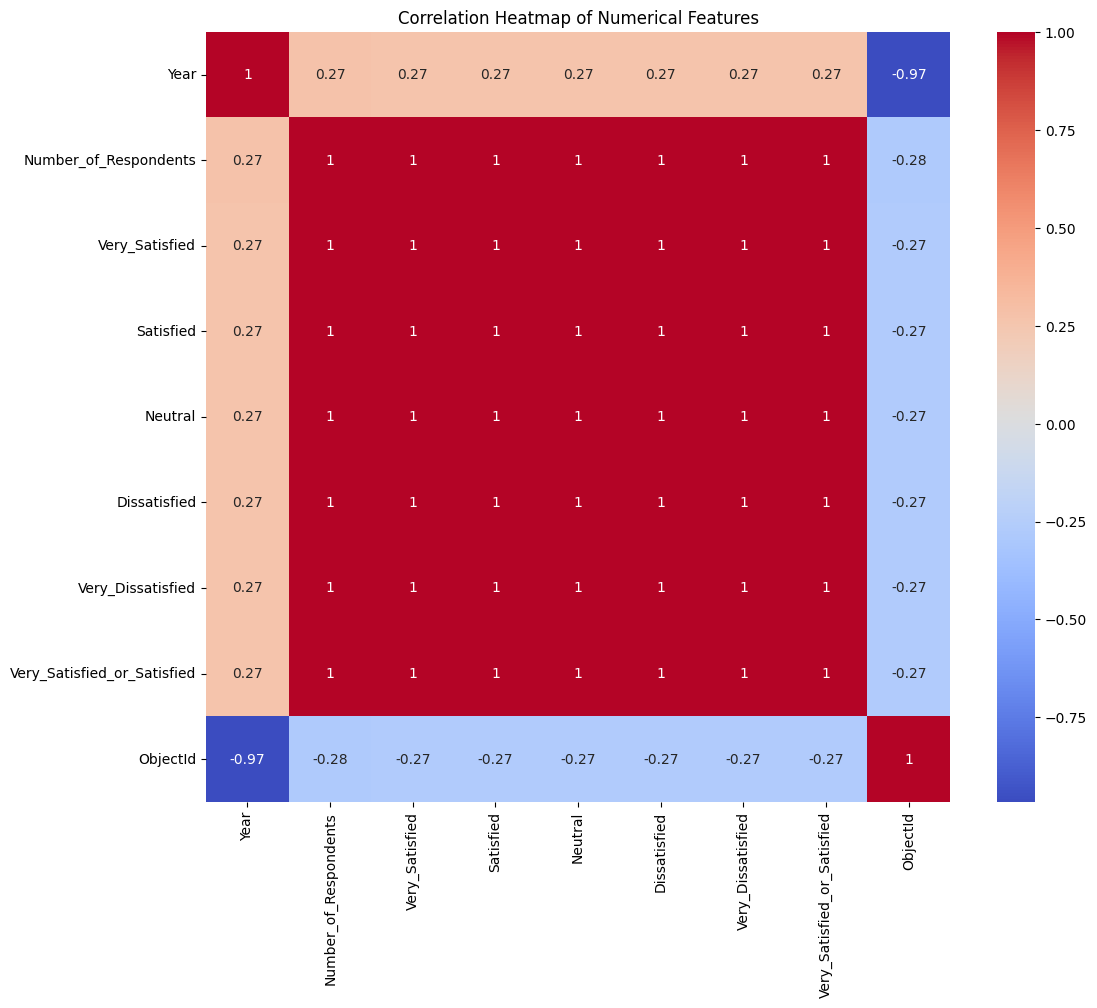

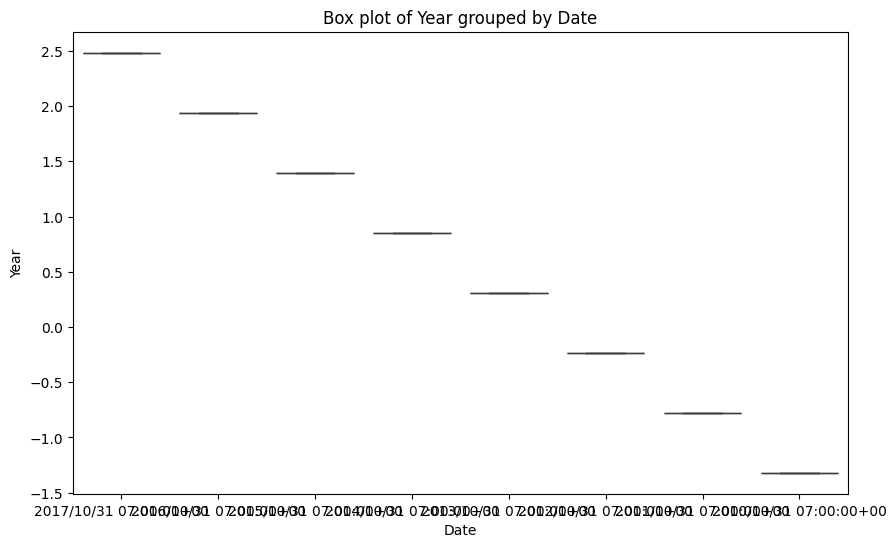

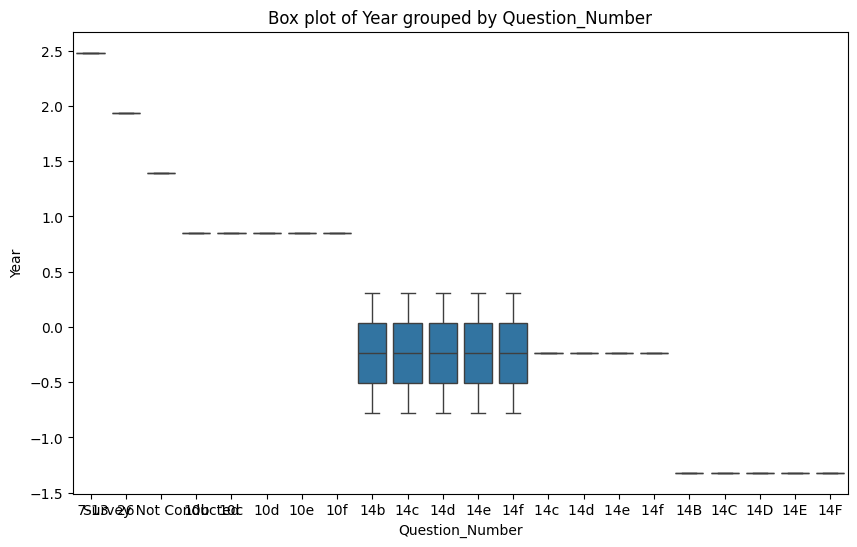

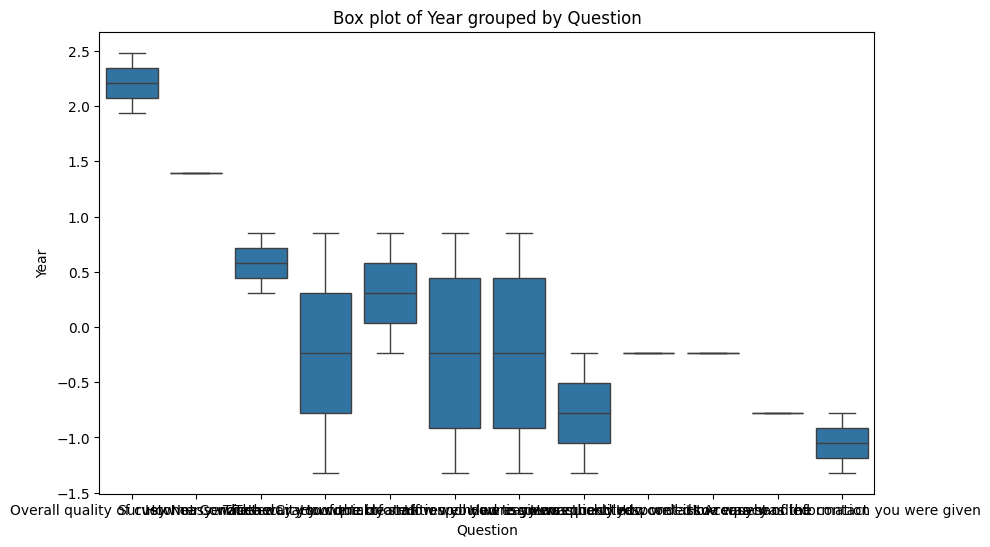

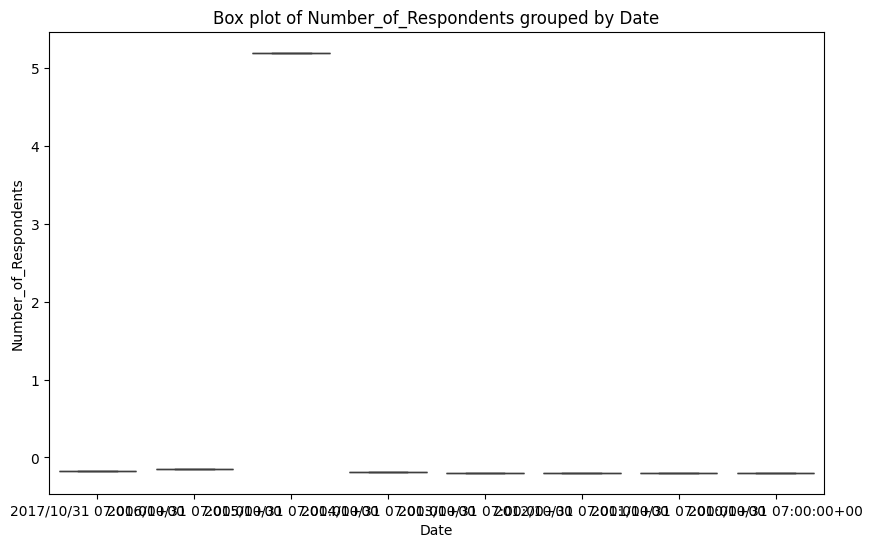

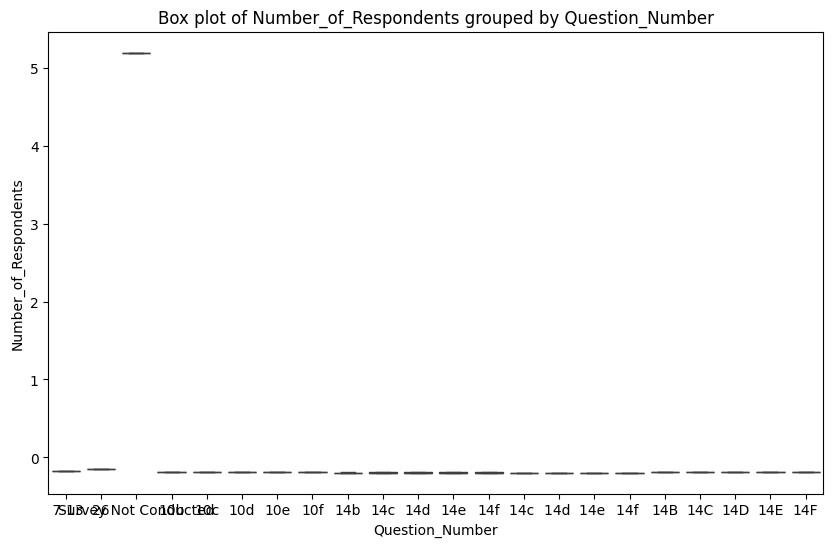

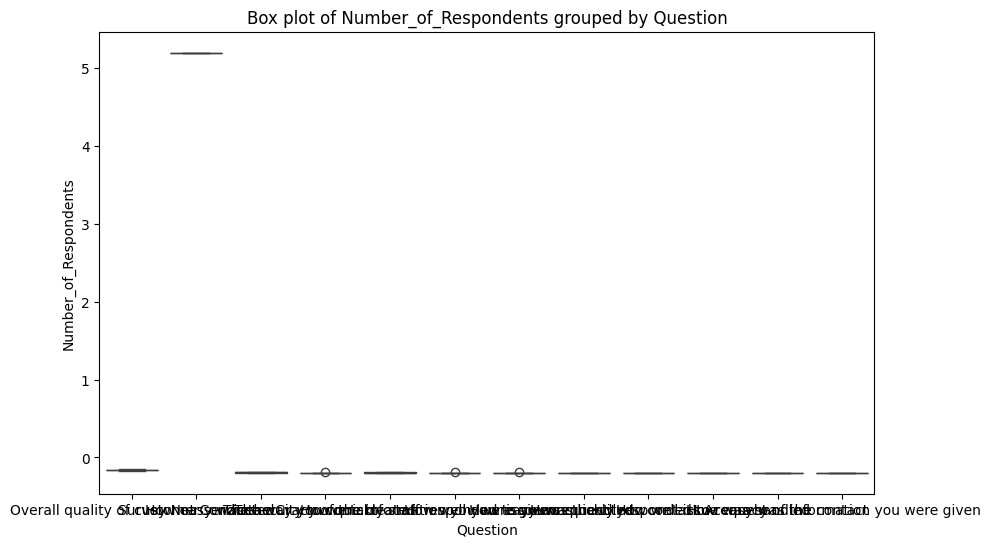

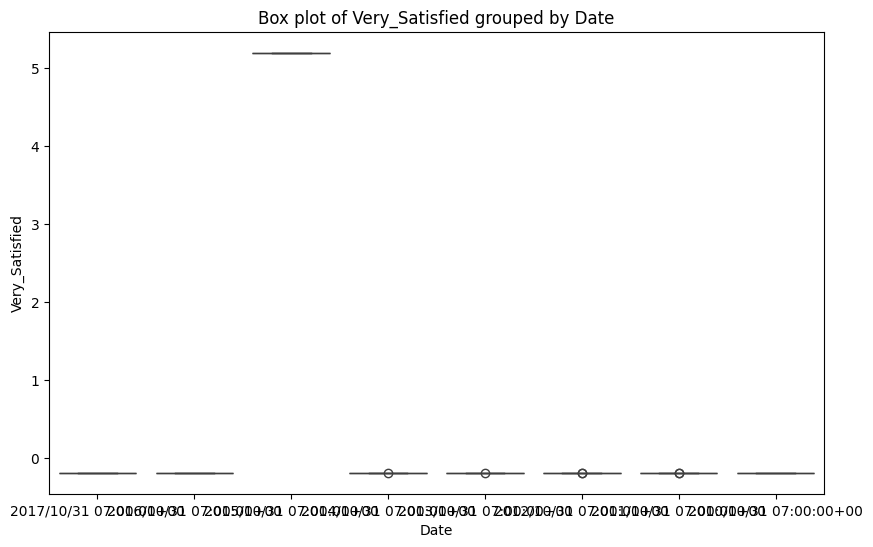

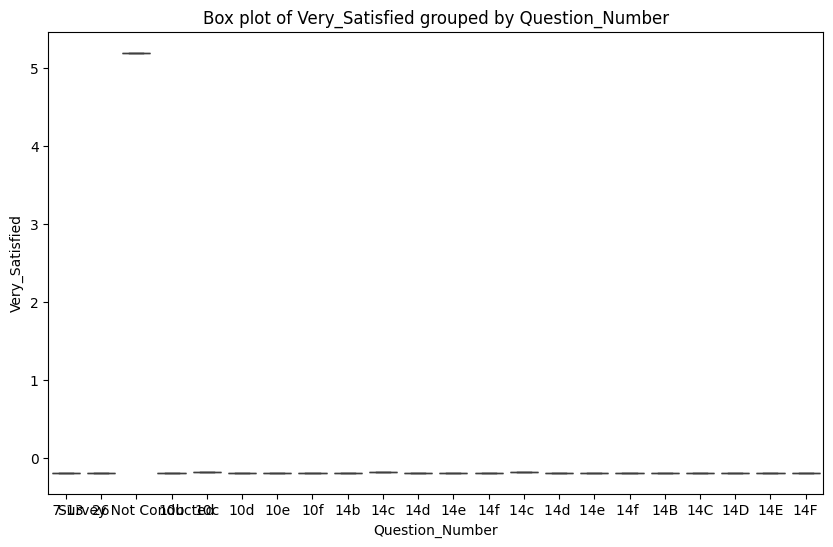

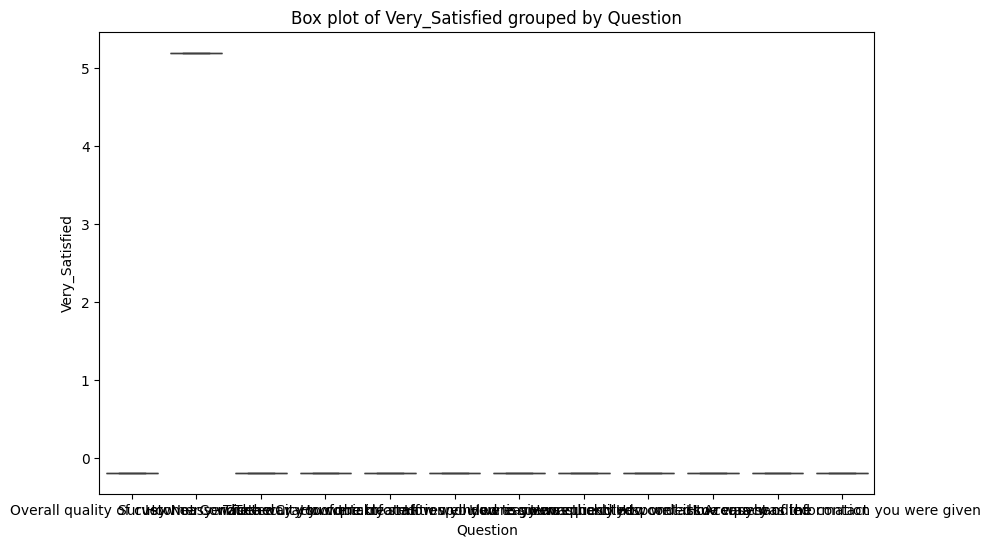

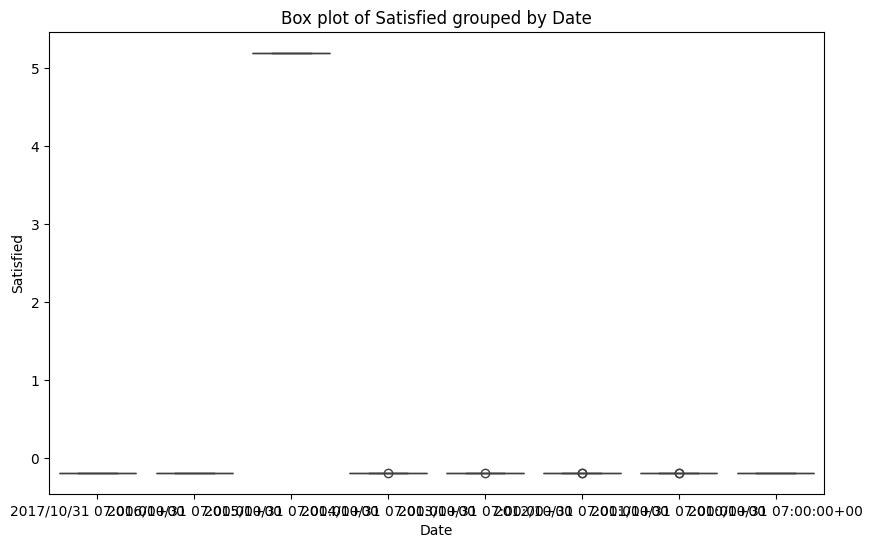

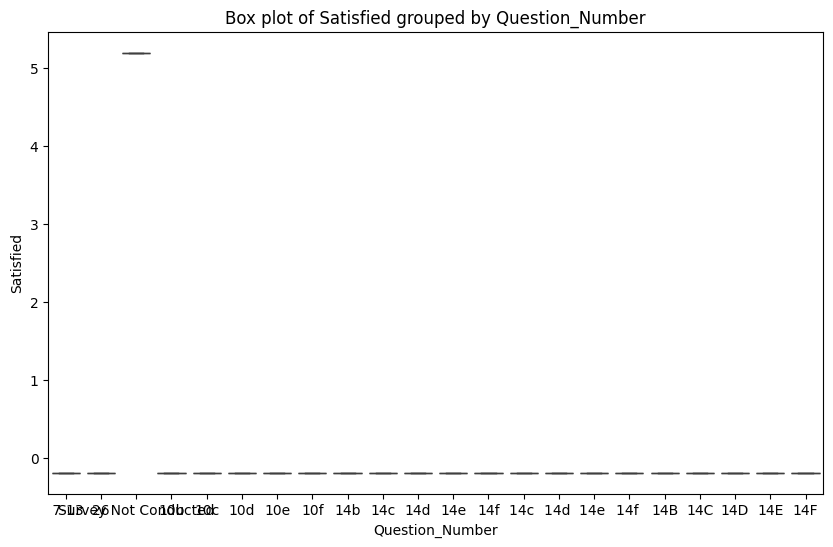

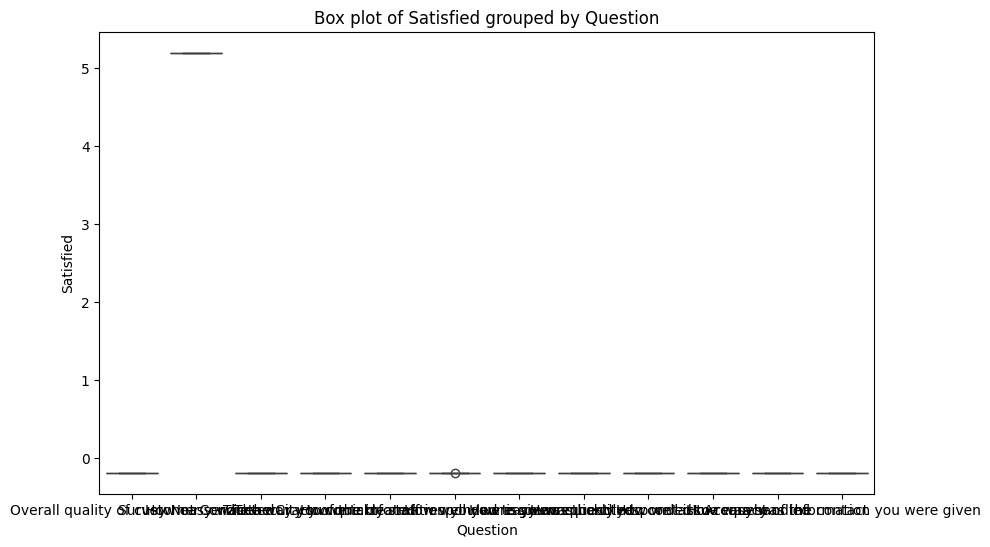

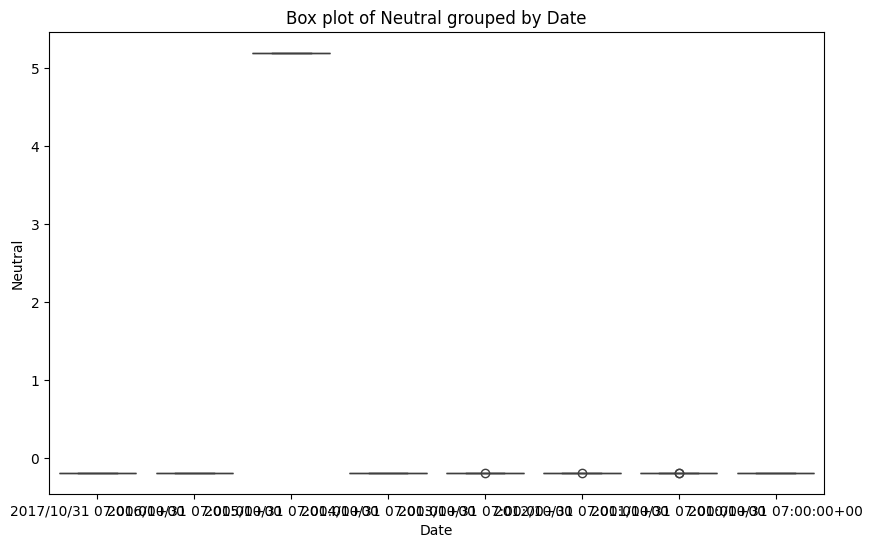

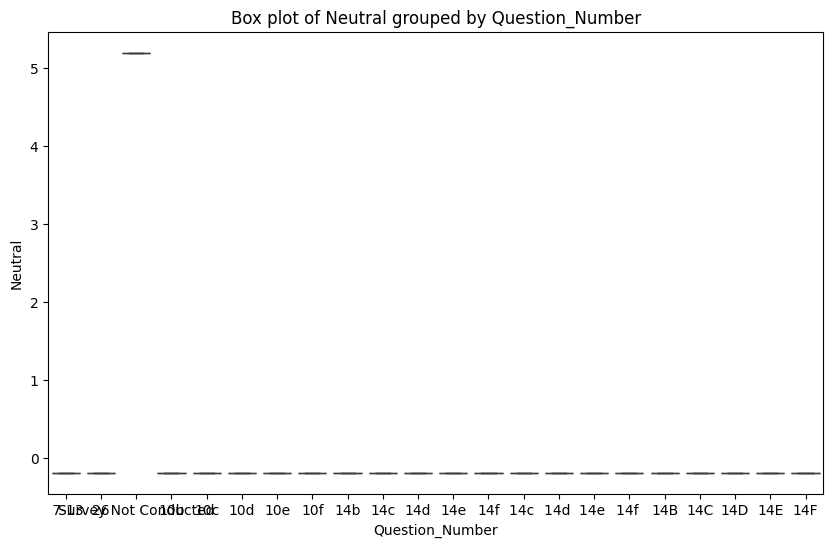

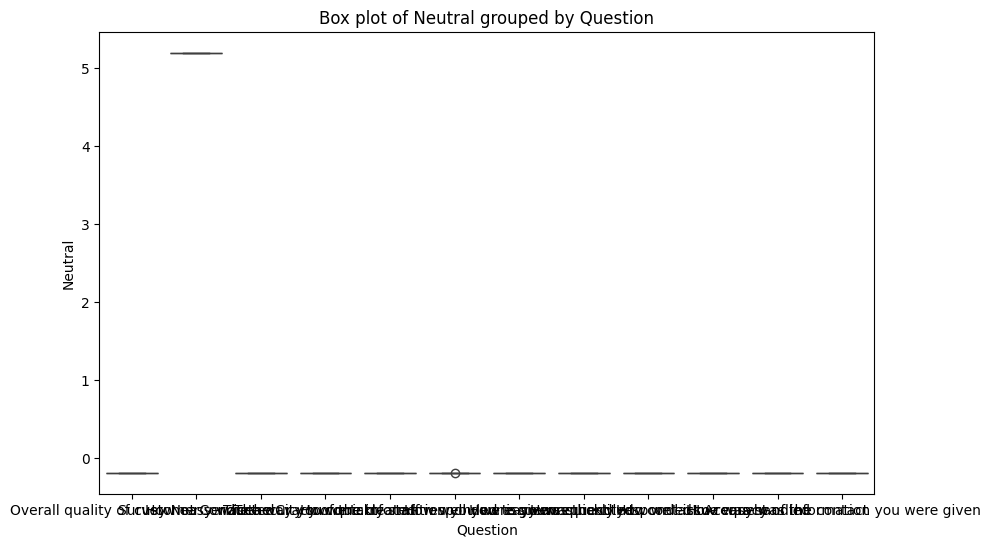

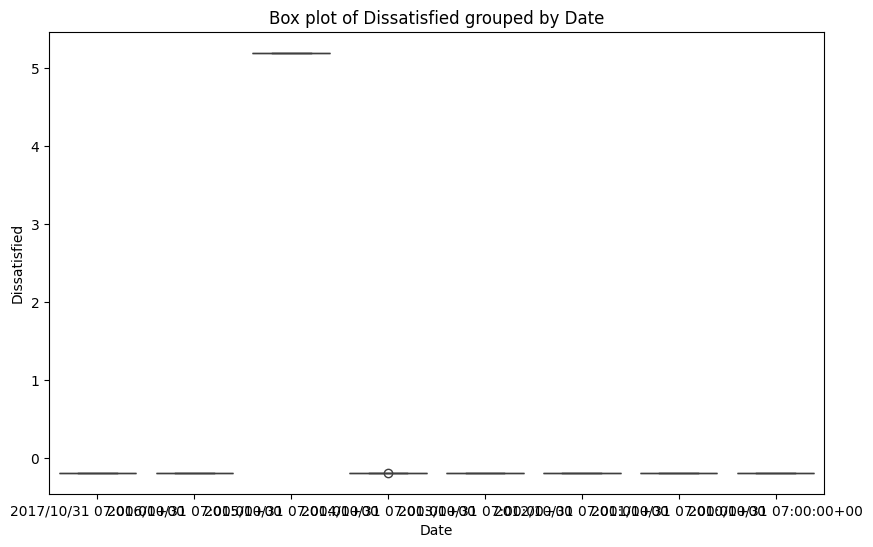

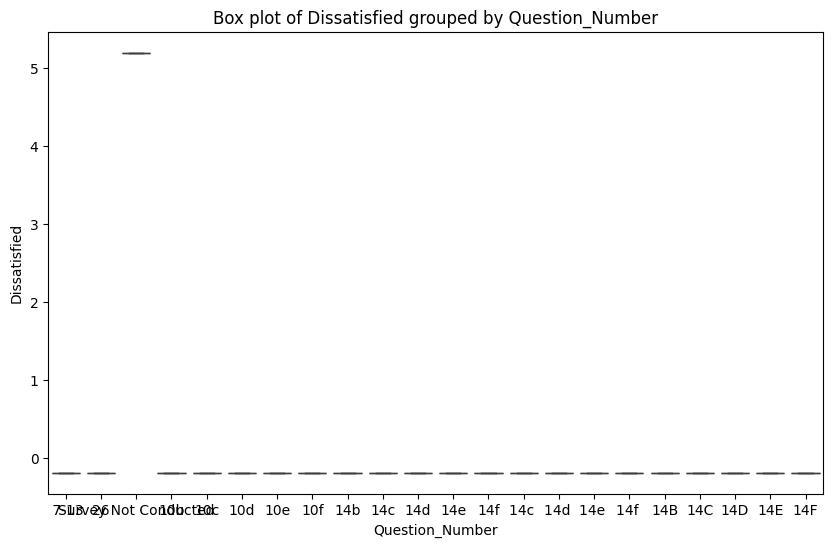

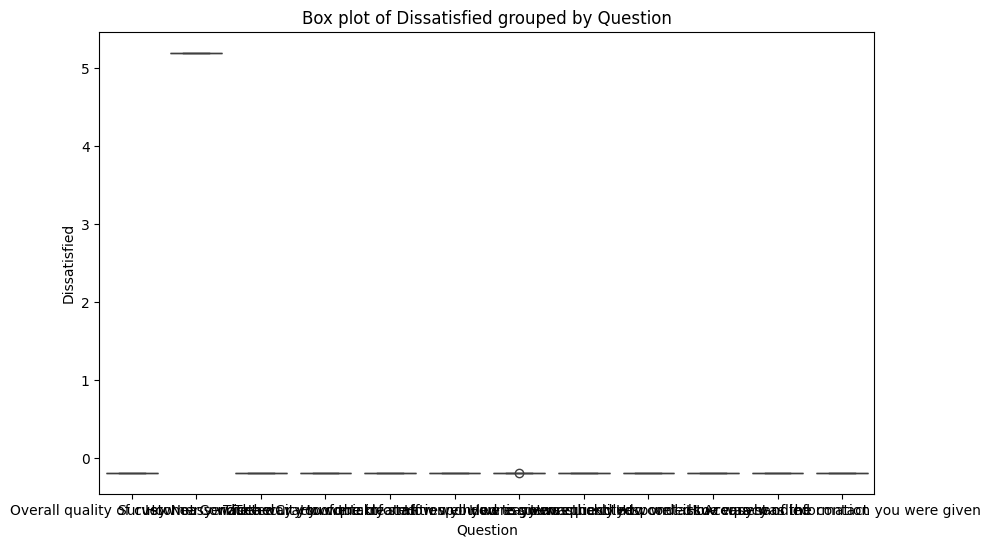

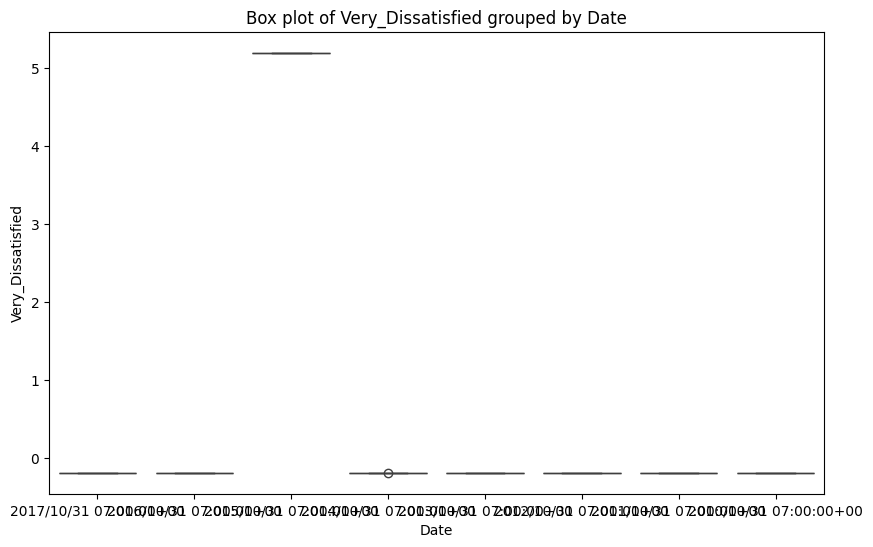

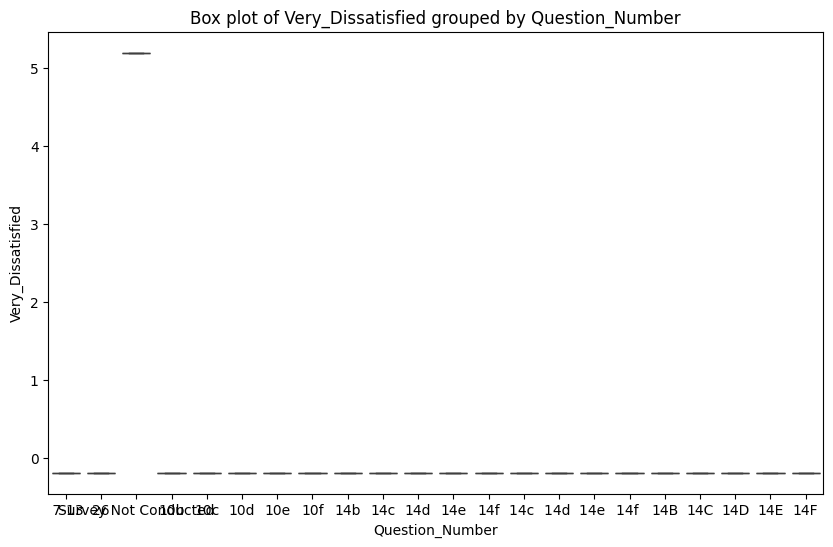

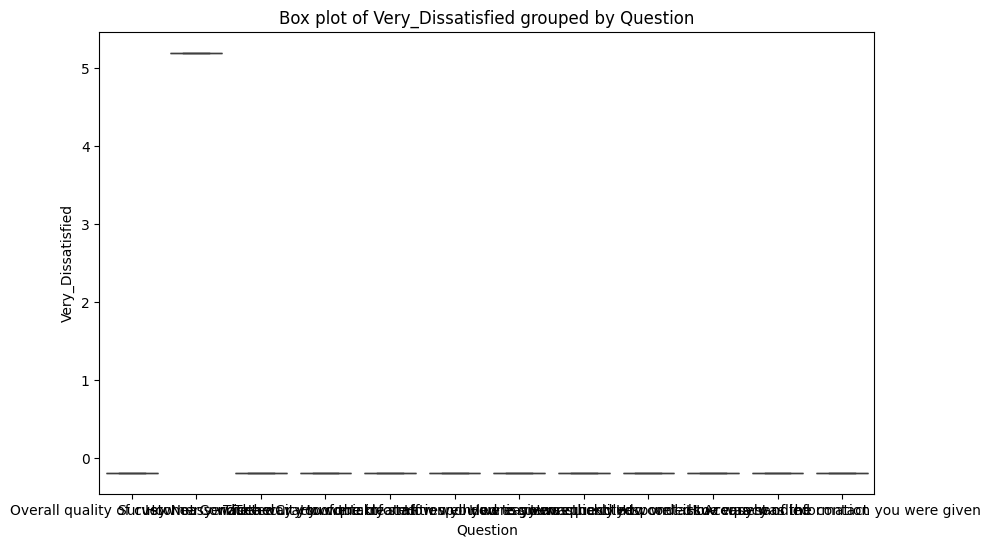

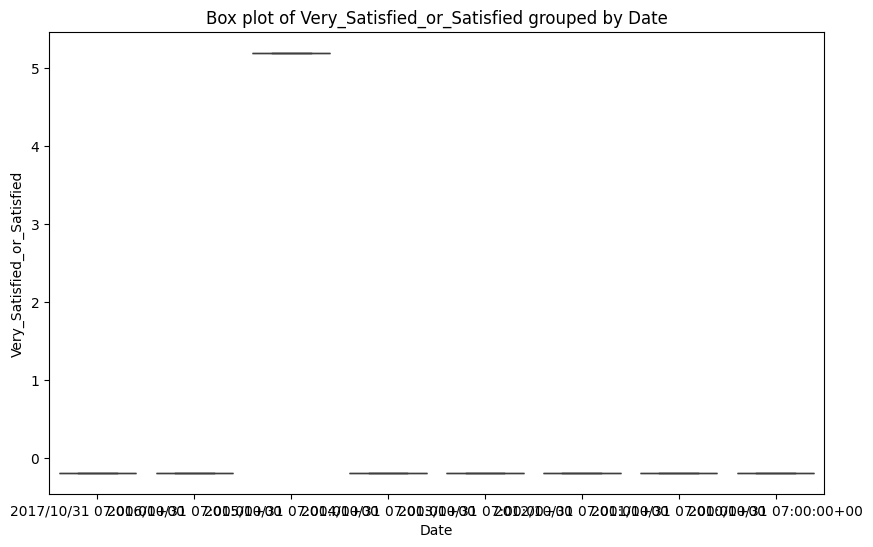

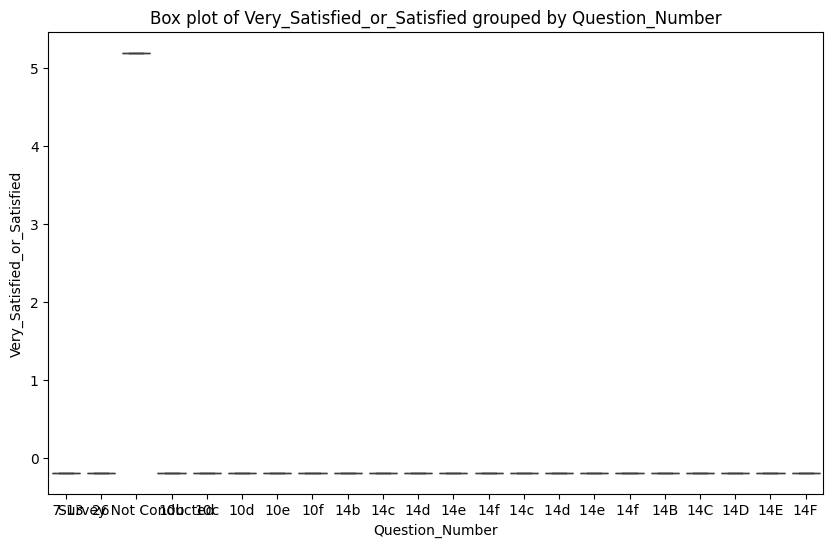

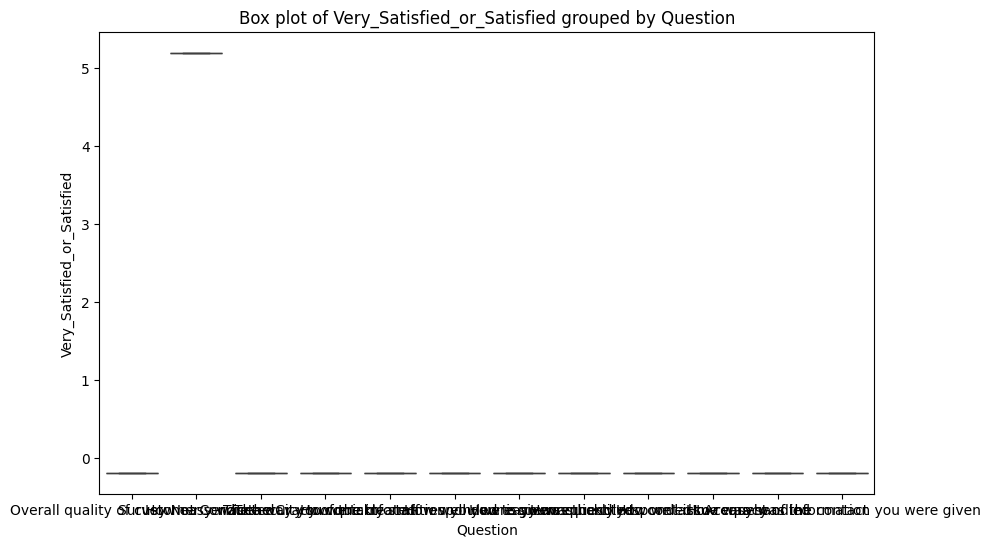

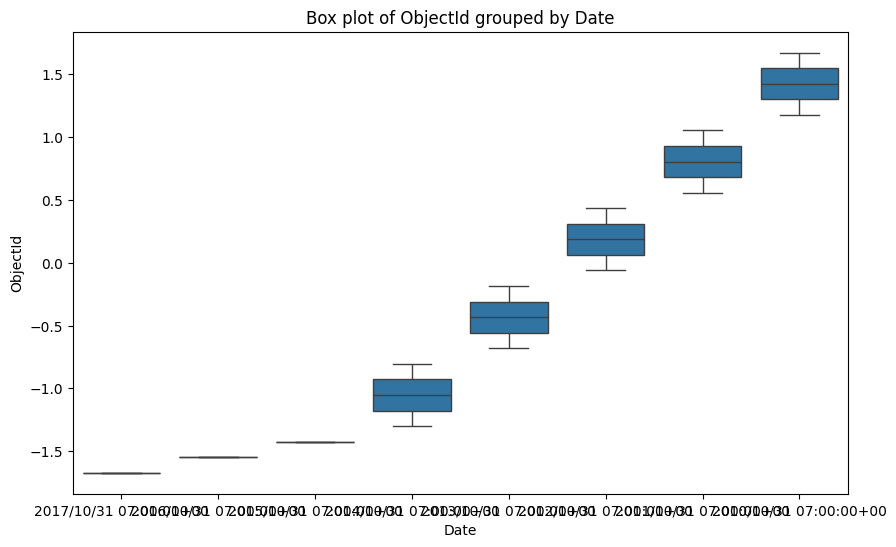

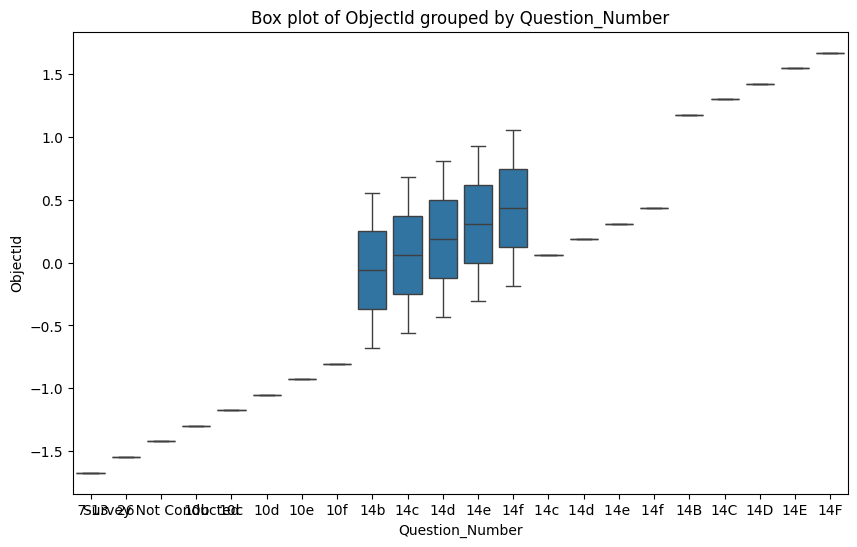

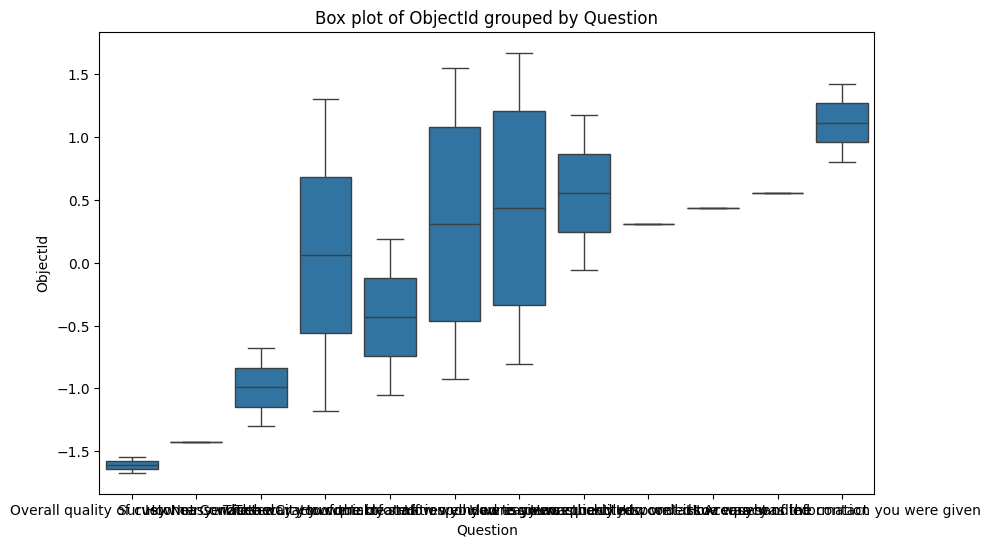

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

# Histograms for numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()


# Bivariate Analysis

# Scatter plots for numerical features
for col1 in numerical_features:
    for col2 in numerical_features:
        if col1 != col2:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=col1, y=col2, data=df)
            plt.title(f'Scatter Plot of {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Box plots for numerical features grouped by a categorical feature
for col in numerical_features:
  for cat_col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x = cat_col, y = col, data=df)
    plt.title(f"Box plot of {col} grouped by {cat_col}")
    plt.show()


Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler


# Create a StandardScaler object
scaler = StandardScaler()

# Select numerical columns for standardization
numerical_cols = df.select_dtypes(include=np.number).columns

# Fit and transform the numerical columns
# Instead of directly assigning to df[numerical_cols], create a new DataFrame
scaled_data = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols, index=df.index)

# Update the original DataFrame with the scaled values
df[numerical_cols] = scaled_df[numerical_cols]


# Print the standardized DataFrame
print("\nStandardized DataFrame:")
df


Standardized DataFrame:


,Year,Date,Question_Number,Question,Number_of_Respondents,Very_Satisfied,Satisfied,Neutral,Dissatisfied,Very_Dissatisfied,Very_Satisfied_or_Satisfied,ObjectId
0,2.483682,2017/10/31 07:00:00+00,7-13,Overall quality of customer service,-0.170565,-0.193284,-0.192013,-0.191776,-0.192621,-0.192560,-0.192846,-1.671258
1,1.940376,2016/10/31 07:00:00+00,26,Overall quality of customer service,-0.153239,-0.193271,-0.192001,-0.191865,-0.192557,-0.192558,-0.192822,-1.547461
2,1.397071,2015/10/31 07:00:00+00,Survey Not Conducted,Survey Not Conducted,5.195945,5.196152,5.196152,5.196152,5.196152,5.196152,5.196152,-1.423664
3,0.853766,2014/10/31 07:00:00+00,10b,How easy was the City to contact,-0.191626,-0.192540,-0.192096,-0.192679,-0.192390,-0.192548,-0.192186,-1.299867
4,0.853766,2014/10/31 07:00:00+00,10c,The way you were treated,-0.191626,-0.192098,-0.192409,-0.192649,-0.192537,-0.192560,-0.192058,-1.176070
5,0.853766,2014/10/31 07:00:00+00,10d,The accuracy of the information you were given,-0.191626,-0.192497,-0.192393,-0.192366,-0.192440,-0.192557,-0.192440,-1.052274
6,0.853766,2014/10/31 07:00:00+00,10e,How quickly staff responded to your request,-0.191626,-0.192427,-0.192551,-0.192419,-0.192377,-0.192480,-0.192528,-0.928477
7,0.853766,2014/10/31 07:00:00+00,10f,How well your issue was handled,-0.191626,-0.192434,-0.192715,-0.192451,-0.192308,-0.192345,-0.192699,-0.804680
8,0.310460,2013/10/31 07:00:00+00,14b,How easy was the City to contact,-0.195146,-0.192447,-0.192190,-0.192690,-0.192382,-0.192542,-0.192187,-0.680883
9,0.310460,2013/10/31 07:00:00+00,14c,The way you were treated,-0.195146,-0.192081,-0.192415,-0.192684,-0.192571,-0.192501,-0.192046,-0.557086


Model Building

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your target variable is 'Exited'
# Check if 'Exited' column exists in the DataFrame
if 'Exited' not in df.columns:
    # If not found, print an error message and stop
    print("Error: 'Exited' column not found in the DataFrame.")
    # You might need to investigate why 'Exited' is missing and fix it
    # For example, if it's a typo, correct the column name
    # Or if it's missing from the data, you need to add it
else:
    X = df.drop('Exited', axis=1)
    y = df['Exited']

    # Convert categorical features to numerical using one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train a Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Error: 'Exited' column not found in the DataFrame.


Visualization

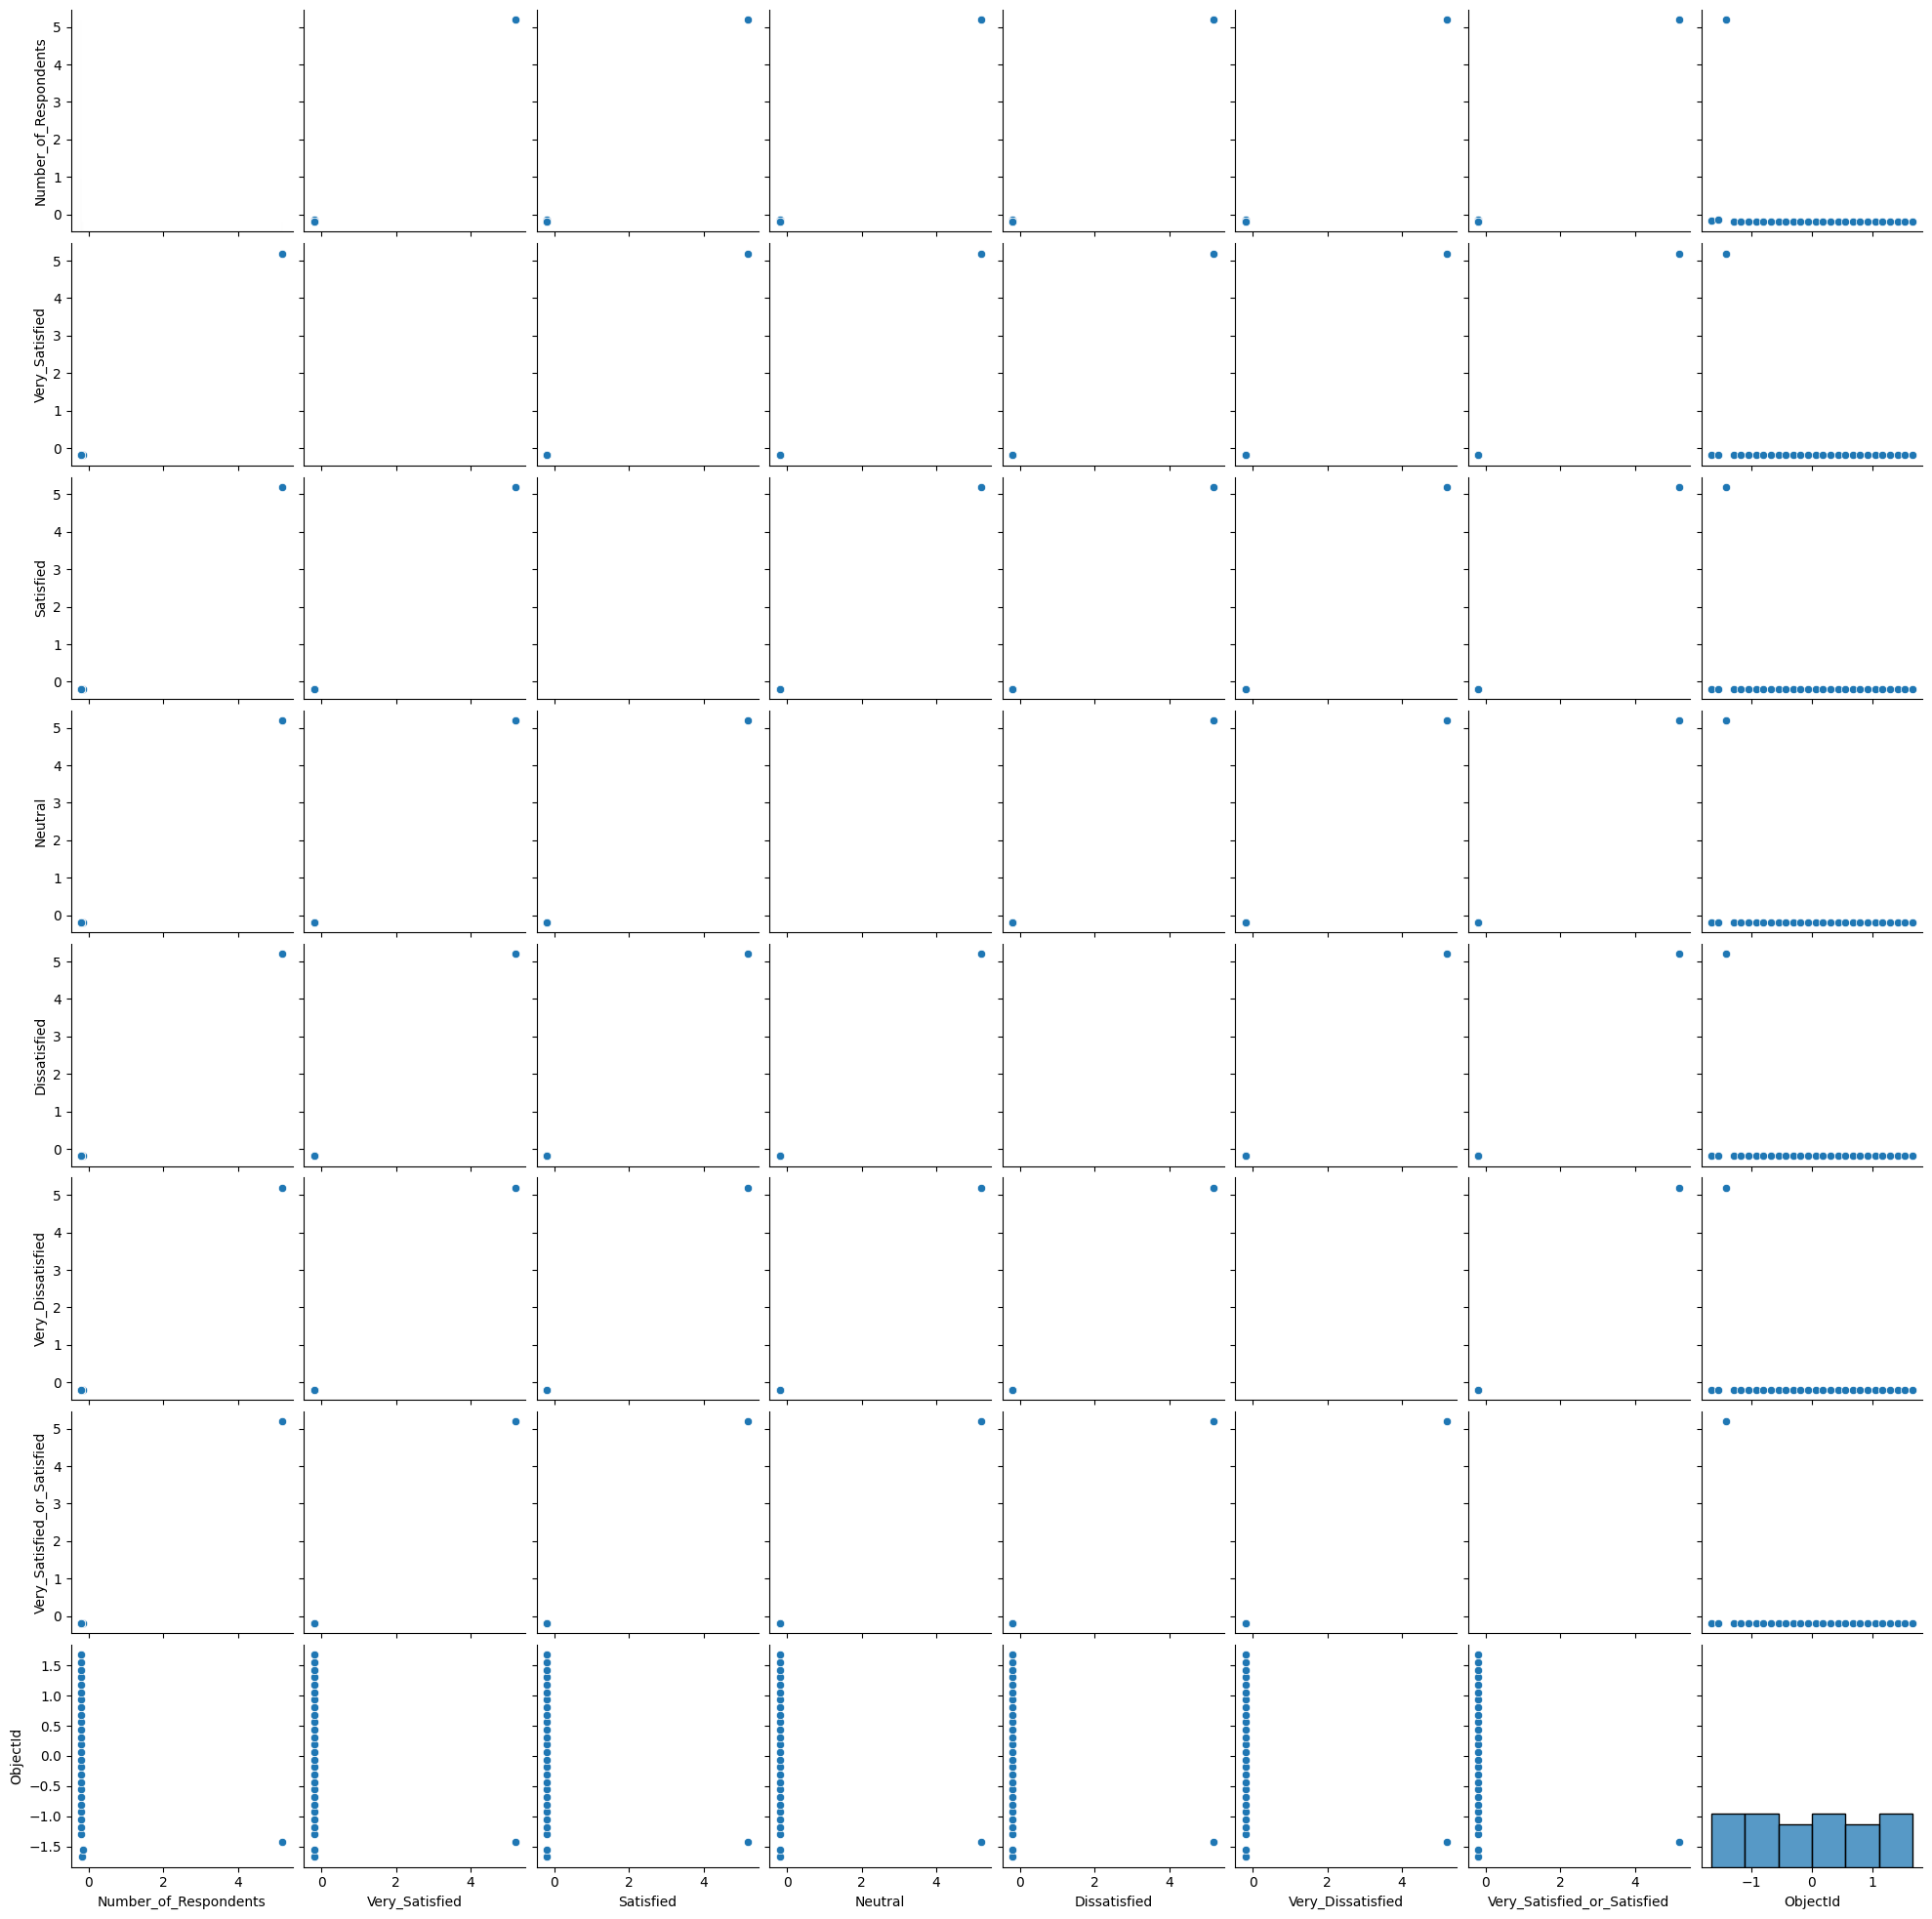

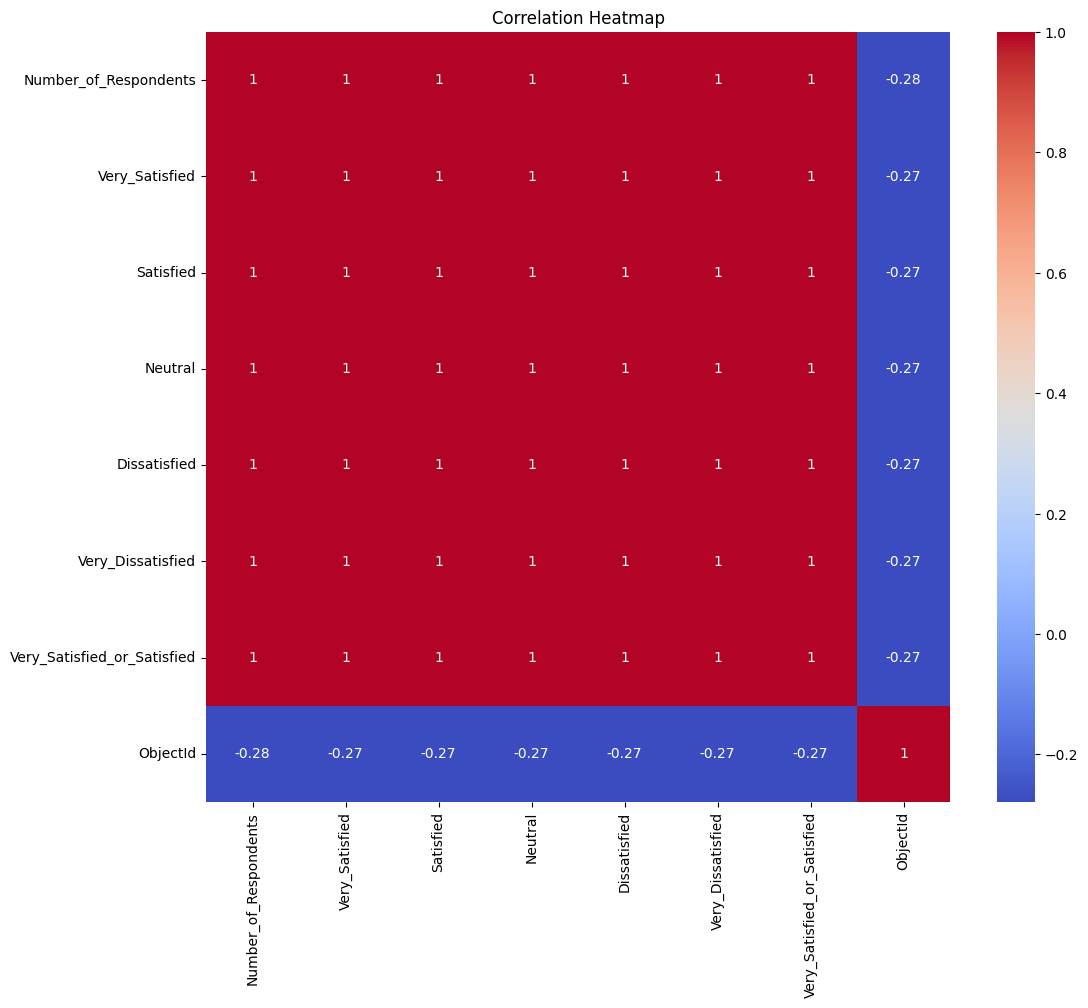

Column 'Geography' not found in DataFrame
Column 'Gender' not found in DataFrame


<Figure size 1000x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame (loaded from customer.csv as in your code)

# Convert 'Year' column to datetime objects
# df['Year'] = pd.to_datetime(df['Year'])  # Assuming 'Year' is the problematic column

# Extract numerical features for correlation
numerical_features = df.select_dtypes(include=np.number).columns

# Example 1: Pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.show()


# Example 2: Correlation heatmap for numerical features only
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Example 3: Boxplot for a specific numerical feature grouped by a categorical feature
plt.figure(figsize=(10, 6))
# Check if 'Geography' is in the columns before plotting
if 'Geography' in df.columns:
    sns.boxplot(x='Geography', y='CreditScore', data=df)  # Replace 'Geography' and 'CreditScore' as needed
    plt.title("CreditScore Distribution by Geography")
    plt.show()
else:
    print("Column 'Geography' not found in DataFrame")

# Example 4: Countplot for a categorical feature
plt.figure(figsize=(8, 6))
# Check if 'Gender' is in the columns before plotting
if 'Gender' in df.columns:
    sns.countplot(x='Gender', data=df) # Replace 'Gender' as needed
    plt.title("Count of Gender")
    plt.show()
else:
    print("Column 'Gender' not found in DataFrame")


In [2]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr

def predict_exit(CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary):
  # Replace this with your actual prediction logic
  # This is a placeholder that always predicts 0
  return 0

iface = gr.Interface(
    fn=predict_exit,
    inputs=[
        gr.Number(label="CreditScore"),
        gr.Dropdown(["France", "Spain", "Germany"], label="Geography"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Number(label="Age"),
        gr.Number(label="Tenure"),
        gr.Number(label="Balance"),
        gr.Number(label="NumOfProducts"),
        gr.Checkbox(label="HasCrCard"),
        gr.Checkbox(label="IsActiveMember"),
        gr.Number(label="EstimatedSalary"),
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Customer Churn Prediction",
    description="Predict customer churn based on various features.",
)

iface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://138e1bf7527418fdf8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
